In [2]:
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import seaborn as sns
import scvelo as scv 
from scipy.stats import zscore
from dtne import *

In [114]:
import sys
print(sys.version)
print(sys.executable)

3.10.10 (tags/v3.10.10:aad5f6a, Feb  7 2023, 17:20:36) [MSC v.1929 64 bit (AMD64)]
E:\Python\python.exe


In [3]:
NR1_2 =sc.read_h5ad('F:/spatial/V1_integration/spatial_tranfer_digital_layer_30.h5ad')

In [4]:
NR2_2 =sc.read_h5ad('F:/spatial/V1_integration/NR2_2/spatial_tranfer_digital_layer_11.h5ad')

In [19]:
NR2_2.obs['digital_layer']

80500     10.000000
80512      9.633808
80513      9.192893
80518      9.744542
80526      9.826572
            ...    
103880     2.001660
103932     1.180436
103952     1.452513
105183     3.018257
105240     1.000000
Name: digital_layer, Length: 4649, dtype: float64

In [5]:
NR = NR1_2.concatenate(NR2_2,batch_categories=['NR1_2', 'NR2_2'],batch_key='slice',index_unique=None,join='outer')

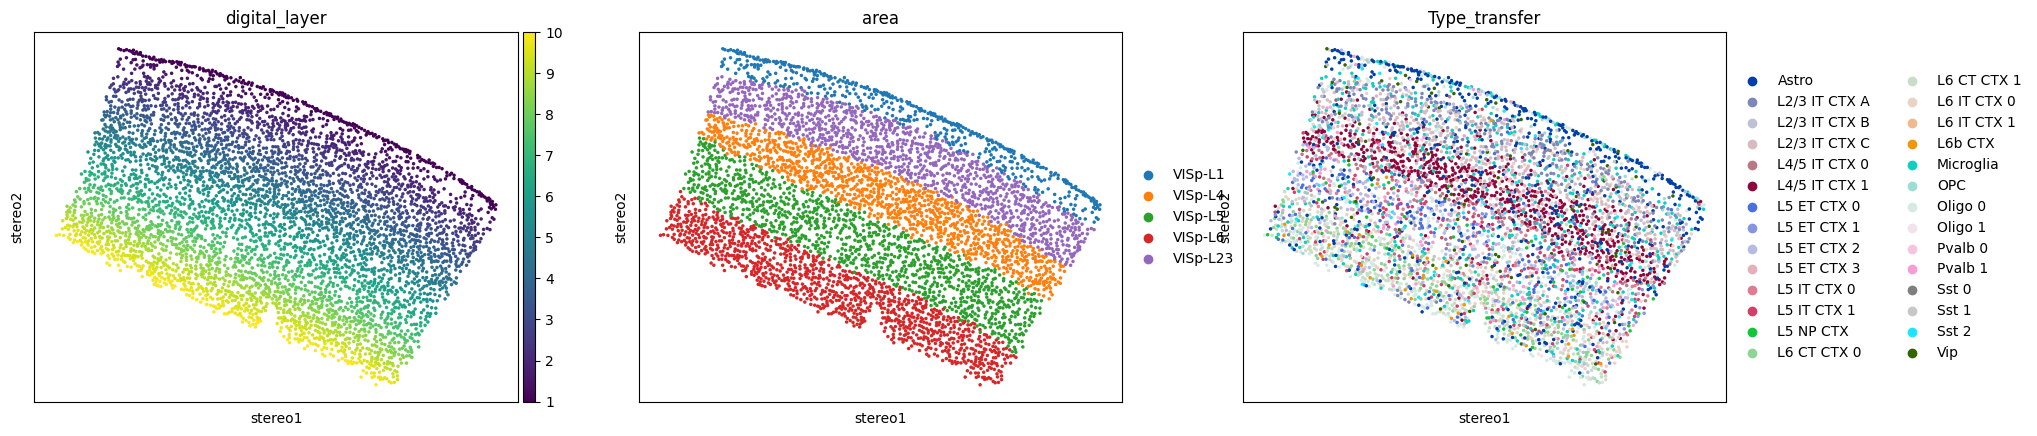

In [7]:
sc.pl.embedding(NR1_2, basis='stereo',color=['digital_layer','area','Type_transfer'],alpha=None)

In [ ]:
组成蓝条的细胞索引： ['94244', '86767', '88749', '90812', '98514', '99470']

In [75]:
NR = NR[NR.obs.index!='94244']
NR = NR[NR.obs.index!='86767']
NR = NR[NR.obs.index!='88749']
NR = NR[NR.obs.index!='90812']
NR = NR[NR.obs.index!='98514']
NR = NR[NR.obs.index!='99470']


In [950]:
NR

View of AnnData object with n_obs × n_vars = 5447 × 26636
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice'
    obsm: 'stereo'
    layers: 'imputed'

In [406]:
NR1_2 = NR1_2[NR1_2.obs['Subclass_transfer']=='L2/3 IT CTX']

In [407]:
NR1_l23 = NR1_2[NR1_2.obs['digital_layer'].between(1, 5.5)]

In [104]:
NR_L23 = NR[NR.obs['Subclass_transfer']=='L2/3 IT CTX']

In [105]:
NR_l23 = NR_L23[NR_L23.obs['digital_layer'].between(1.5, 4)]

In [106]:
NR_l23_1

NameError: name 'NR_l23_1' is not defined

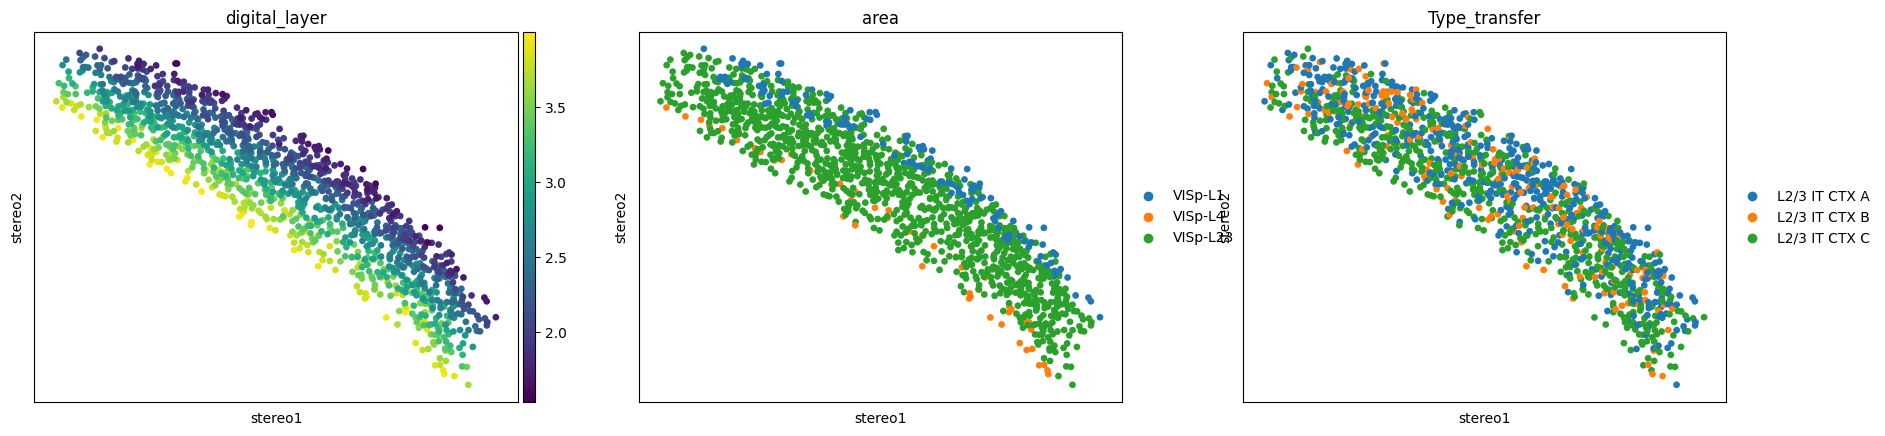

In [107]:
sc.pl.embedding(NR_l23, basis='stereo',color=['digital_layer','area','Type_transfer'],alpha=None)

In [885]:
NR_V1_L23_PC1gene = pd.read_csv('F:/spatial/V1_integration/NR_V1_L23_PC1rank.csv',index_col='Gene')

In [886]:
NR_V1_L23_PC1gene

Empty DataFrame
Columns: []
Index: [Arl6ip6, Gm44957, Gm46124, Msc, Fgfr1, Gm42775, Gm43458, Sap30l, Tll1, Cyb561a3, Dkk2, Cbarp, Gm17750, Gba, Rprml, Tiparp, 1700110K17Rik, Catspere2, 1700112D23Rik, Gm26691, Kctd8, 9330154J02Rik, Kitl, Gm11417, Phkb, A330069K06Rik, Ppih, Slc25a22, Phactr2, Col28a1, Gm12446, Junb, Egr3, Nphp1, Ndufa7, Arl5b, Fosl2, Ift81, C230034O21Rik, Hadh, Gm17036, Dph7, Gm36198, St6galnac3, Sycp3, Gm33228, Hook2, Trpc6, Garnl3, Gm40293, C030047K22Rik, Susd1, Gm16036, Phykpl, Gm48321, Tcerg1l, Ctbp2, Gm11802, Lcorl, Zfp710, Trim43c, Gm42556, 4933407E24Rik, Teddm2, Kif13a, Cdh20, mt-Atp6, Slc6a11, Skap1, B230323A14Rik, Pcsk2os2, Ttc26, Tpd52l1, 1700024B18Rik, Ghr, Wwox, Prune2, Per2, 4933411O13Rik, Zswim5, Grasp, Rgma, Dock10, Kcnn2, 1110019D14Rik, Pkhd1, Rtl4, Gm49959, Mest, Eya1, Mansc1, Pappa, Gm20063, Immp2l, Hcn1, Tarbp1, Pebp4, Bmerb1, Camkmt, Gm35867, ...]

[906 rows x 0 columns]

In [887]:
adata_index =NR_l23.var.index.astype(str)

In [888]:
adata_index

Index(['0610005C13Rik', '0610006L08Rik', '0610009B22Rik', '0610009O20Rik',
       '0610010F05Rik', '0610010K14Rik', '0610012D04Rik', '0610012G03Rik',
       '0610025J13Rik', '0610030E20Rik',
       ...
       'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd3', 'mt-Nd4',
       'mt-Nd4l', 'mt-Nd5', 'mt-Nd6'],
      dtype='object', length=26636)

In [889]:
PC1_index =NR_V1_L23_PC1gene.index.astype(str)

In [890]:
PC1_index

Index(['Arl6ip6', 'Gm44957', 'Gm46124', 'Msc', 'Fgfr1', 'Gm42775', 'Gm43458',
       'Sap30l', 'Tll1', 'Cyb561a3',
       ...
       'Cdh12', 'Rfx3', 'Robo1', 'Kirrel3', 'Cdh13', 'Sorcs3', 'Cntn5',
       'Epha6', 'Egfem1', 'Etl4'],
      dtype='object', name='Gene', length=906)

In [891]:
common_index  =PC1_index.intersection(adata_index)

In [892]:
common_index

Index(['Arl6ip6', 'Gm46124', 'Msc', 'Fgfr1', 'Gm42775', 'Gm43458', 'Sap30l',
       'Tll1', 'Cyb561a3', 'Dkk2',
       ...
       'Cdh12', 'Rfx3', 'Robo1', 'Kirrel3', 'Cdh13', 'Sorcs3', 'Cntn5',
       'Epha6', 'Egfem1', 'Etl4'],
      dtype='object', length=866)

In [893]:
NR_l23_PC1 =NR_l23[:,common_index]

In [894]:
# 备份原始数据的 X 矩阵
NR_L23.layers['original_X'] = NR_L23.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_L23.X = NR_L23.layers['imputed'].copy()
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
NR_L23.X = np.nan_to_num(NR_L23.X, nan=0)

In [108]:
# 备份原始数据的 X 矩阵
NR_l23.layers['original_X'] = NR_l23.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_l23.X = NR_l23.layers['imputed'].copy()
NR_l23.X = np.nan_to_num(NR_l23.X, nan=0)

In [896]:
# 备份原始数据的 X 矩阵
NR_l23_PC1.layers['original_X'] = NR_l23_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_l23_PC1.X = NR_l23_PC1.layers['imputed'].copy()

In [897]:
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
NR_l23.X = np.nan_to_num(NR_l23.X, nan=0)

In [898]:
NR_l23_PC1.X = np.nan_to_num(NR_l23_PC1.X, nan=0)

In [899]:
NR_l23_PC1

AnnData object with n_obs × n_vars = 1271 × 866
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice'
    uns: 'area_colors', 'Type_transfer_colors'
    obsm: 'stereo'
    layers: 'imputed', 'original_X'

In [900]:
# Step 1: 获取基因表达数据
g = NR_l23_PC1.X.mean(axis=1).flatten()  # 计算基因表达均值

# Step 2: 计算 vmin 和 vmax
vmin, vmax = np.percentile(g, 1), np.percentile(g, 99)

# Step 3: 创建布尔掩码
mask = (g >= vmin) & (g <= vmax)
filtered_NR_l23_PC1 = NR_l23_PC1[mask]
removed_cells = NR_l23_PC1.obs[~mask].index  # 获取被移除的细胞索引

# Step 5: 在 NR_l23 中去掉相同的细胞
filtered_NR_l23 = NR_l23[~NR_l23.obs.index.isin(removed_cells)]  # 筛选 NR_l23 中的细胞

# 打印结果
print(f"原始 NR_l23_PC1 细胞数: {NR_l23_PC1.n_obs}, 筛选后: {filtered_NR_l23_PC1.n_obs}")
print(f"原始 NR_l23 细胞数: {NR_l23.n_obs}, 筛选后: {filtered_NR_l23.n_obs}")


原始 NR_l23_PC1 细胞数: 1271, 筛选后: 1245
原始 NR_l23 细胞数: 1271, 筛选后: 1245


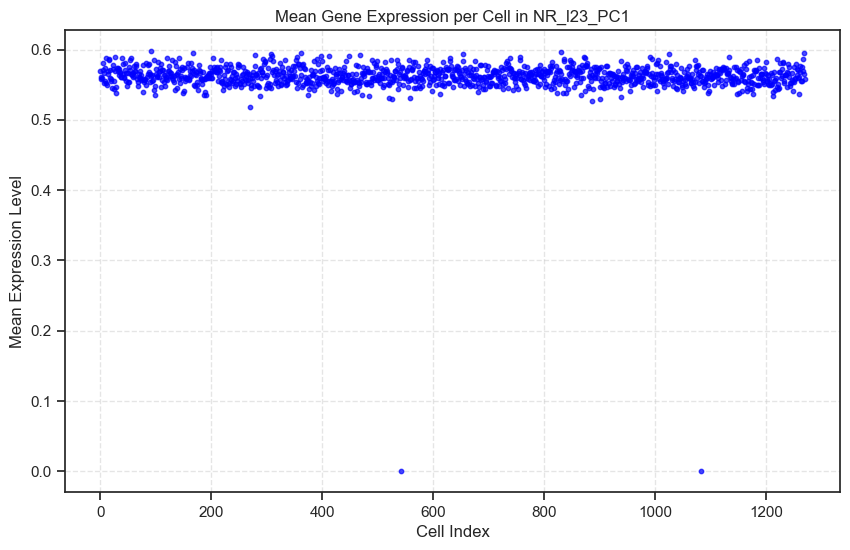

In [901]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = NR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in NR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


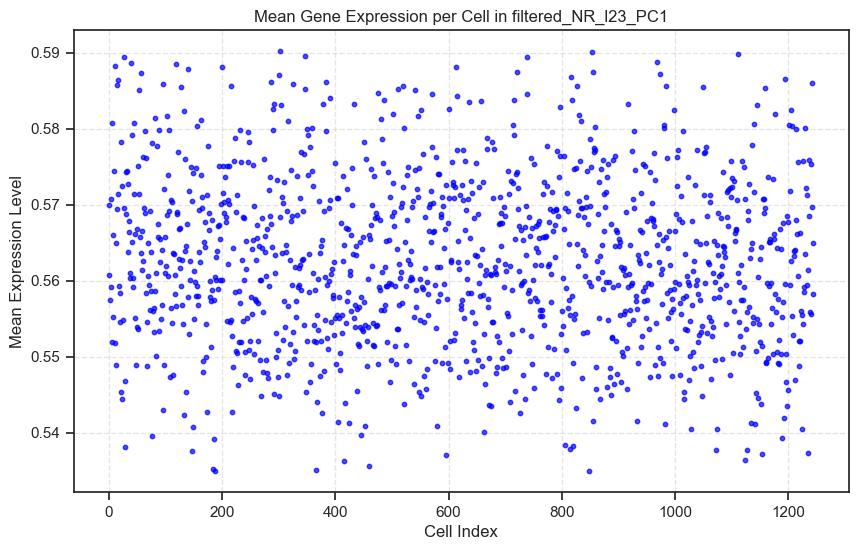

In [902]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = filtered_NR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in filtered_NR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


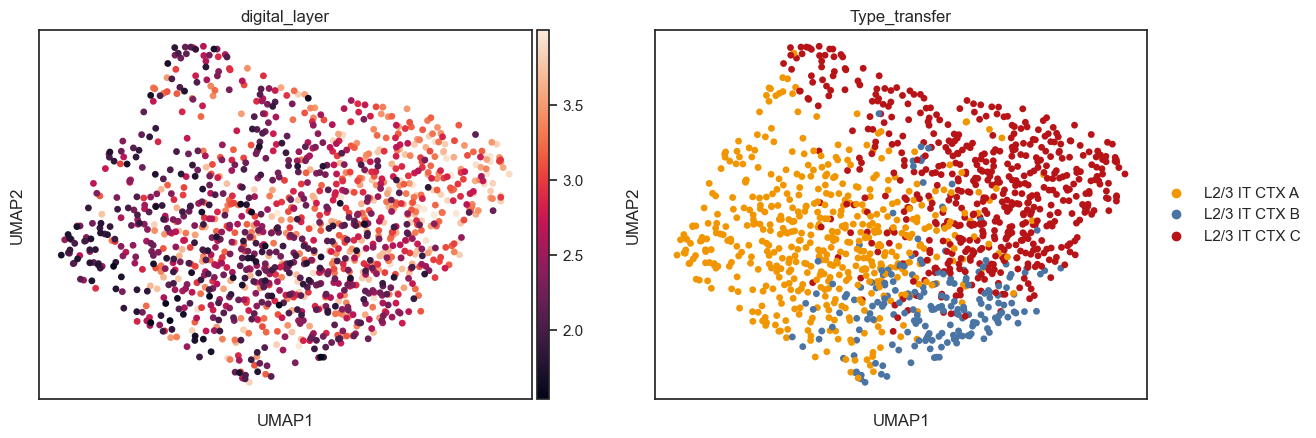

In [925]:
sc.pp.pca(filtered_NR_l23_PC1)
sc.pp.neighbors(filtered_NR_l23_PC1,use_rep='X_pca')
sc.tl.umap(filtered_NR_l23_PC1)
sc.pl.umap(filtered_NR_l23_PC1, color=['digital_layer','Type_transfer'],palette=["#f29600", "#4974a4", "#b81316"])

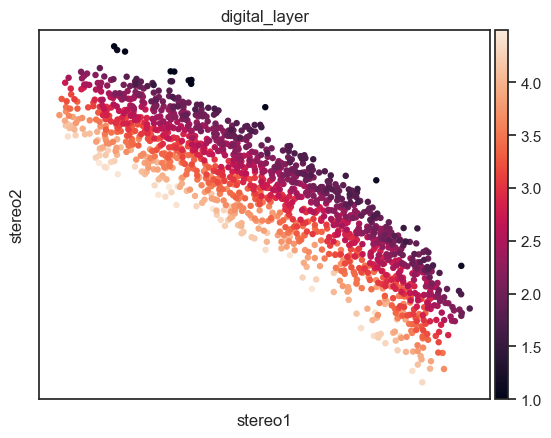

In [313]:
sc.pl.embedding(NR_l23_PC1, basis='stereo',color='digital_layer',alpha=None)

In [779]:
N_l23_umap = NR_l23_PC1.obsm['X_umap']

In [86]:
np.argmin(N_l23_umap).max(axis=0)

563

In [431]:
np.argmax(N_l23_umap).max(axis=0)

454

In [432]:
NR1_l23_PC1[NR1_l23_PC1.obs.index[454]].obs 

orig.ident  nCount_Spatial  nFeature_Spatial     area  coor_x  coor_y  \
90894    Spatial           430.0               241  VISp-L4   14260    8549   

      areaL1     coor_x_ad     coor_y_ad left_right  areaL2   ident  \
90894     V1  12472.935153  11862.566801      right  Cortex  region   

      integration_partition_transfer  integration_partition_confidence  \
90894                            p61                          0.823979   

      Subclass_transfer  Subclass_confidence  Type_transfer  Type_confidence  \
90894       L2/3 IT CTX                  1.0  L2/3 IT CTX C         0.637221   

       digital_layer leiden  
90894       4.124045      2

In [767]:
NR_l23_PC1[NR_l23_PC1.obs.index[1073]].obs

orig.ident  nCount_Spatial  nFeature_Spatial      area  coor_x  coor_y  \
95936    Spatial           639.0               332  VISp-L23   14701   20431   

      areaL1     coor_x_ad     coor_y_ad left_right  ...  \
95936     V1  12476.972497  11818.869539      right  ...   

      integration_partition_confidence Subclass_transfer Subclass_confidence  \
95936                         0.937218       L2/3 IT CTX                 1.0   

       Type_transfer Type_confidence  digital_layer  slice  leiden  highlight  \
95936  L2/3 IT CTX C         0.75402        3.84287  NR2_2       1       True   

      dpt_pseudotime  
95936            0.0  

[1 rows x 23 columns]

In [769]:
N_l23_umap[1073]

13.68293

In [818]:
NR_l23_PC1[NR_l23_PC1.obs.index[69]].obs

orig.ident  nCount_Spatial  nFeature_Spatial     area  coor_x  coor_y  \
77123    Spatial           852.0               573  VISp-L5   12417    8309   

      areaL1     coor_x_ad     coor_y_ad left_right  ...  \
77123     V1  10657.865702  12262.281562      right  ...   

      integration_partition_confidence Subclass_transfer Subclass_confidence  \
77123                         0.588525       L2/3 IT CTX                 1.0   

       Type_transfer Type_confidence  digital_layer  slice  leiden  highlight  \
77123  L2/3 IT CTX C        0.657888       5.484989  NR1_2       1      False   

      dpt_pseudotime  
77123       0.046283  

[1 rows x 23 columns]

In [926]:
sc.pp.neighbors(filtered_NR_l23_PC1,use_rep='X_pca')
sc.tl.diffmap(filtered_NR_l23_PC1)
filtered_NR_l23_PC1.uns['iroot'] = np.flatnonzero(filtered_NR_l23_PC1.obs.index  == '95936')[0]
sc.tl.dpt(filtered_NR_l23_PC1)

In [125]:
filtered_NR_l23_PC1.write_h5ad('filtered_NR_l23_PC1.h5ad')

In [9]:
import scanpy as sc

In [10]:
filtered_NR_l23_PC1=sc.read_h5ad('filtered_NR_l23_PC1_spatial.h5ad')

In [5]:
NR_l23_PC1=sc.read_h5ad('NR_l23_PC1_spatial.h5ad')

In [974]:
NR_l23_PC1

AnnData object with n_obs × n_vars = 1451 × 866
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'highlight'
    uns: 'neighbors', 'diffmap_evals', 'iroot', 'Type_transfer_colors', 'highlight_colors'
    obsm: 'stereo', 'X_diffmap', 'X_stereo'
    layers: 'imputed', 'original_X'
    obsp: 'distances', 'connectivities'

saving figure to file ./figures/scvelo_NR_l23_dpt.pdf


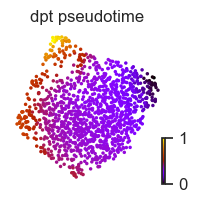

saving figure to file ./figures/scvelo_NR_l23_Type.pdf


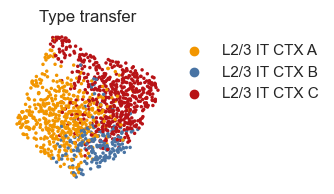

saving figure to file ./figures/scvelo_NR_l23_digital_layer.pdf


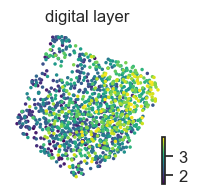

In [931]:
scv.pl.scatter(filtered_NR_l23_PC1, basis='X_umap',color='dpt_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),size=25,save='NR_l23_dpt.pdf')
scv.pl.umap(filtered_NR_l23_PC1, color='Type_transfer',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),size=25,save='NR_l23_Type.pdf')
scv.pl.umap(filtered_NR_l23_PC1, color='digital_layer',cmap='viridis',figsize=(2,2),size=25,save='NR_l23_digital_layer.pdf')

In [213]:
NR_l23_PC1

AnnData object with n_obs × n_vars = 1451 × 866
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'highlight', 'gene_set_mean'
    uns: 'Type_transfer_colors', 'diffmap_evals', 'highlight_colors', 'iroot', 'neighbors'
    obsm: 'X_diffmap', 'X_stereo', 'stereo'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

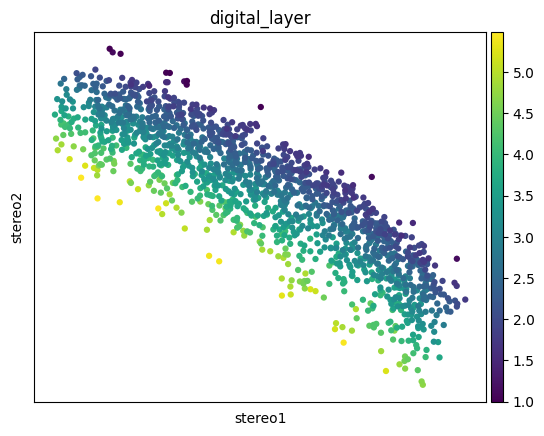

In [882]:
sc.pl.embedding(NR_l23_PC1, basis='stereo',color='digital_layer',alpha=None)

In [825]:
NR_l23_PC1.var.index

Index(['Arl6ip6', 'Gm46124', 'Msc', 'Fgfr1', 'Gm42775', 'Gm43458', 'Sap30l',
       'Tll1', 'Cyb561a3', 'Dkk2',
       ...
       'Cdh12', 'Rfx3', 'Robo1', 'Kirrel3', 'Cdh13', 'Sorcs3', 'Cntn5',
       'Epha6', 'Egfem1', 'Etl4'],
      dtype='object', length=866)

In [96]:
adata = filtered_NR_l23_PC1
data_clusters = adata.obs['Type_transfer']
#data_clusters_set = set(data_clusters.values)
#zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
#dict_types = dict(zip_types)
#cell_clusters  =  [dict_types[i] for i in data_clusters.values]
cell_clusters = list(data_clusters.values)
X_pca  = adata.obsm['X_pca']

In [999]:
from matplotlib import colors as mcolors
# 将数据导出为 DataFrame，方便操作
df = filtered_NR_l23_PC1.obs[['dpt_pseudotime', 'Type_transfer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 为每个 Type_transfer 设定颜色（可以根据实际需要修改配色）
type_colors = {
    'L2/3 IT CTX A': "#f29600",  # 示例颜色
    'L2/3 IT CTX B': "#4974a4",
    'L2/3 IT CTX C': "#b81316"
}

# 为每个细胞匹配对应的颜色
df_sorted['color'] = df_sorted['Type_transfer'].map(type_colors)
color_rgb = np.array([mcolors.to_rgba(color) for color in df_sorted['color']])

# 将颜色数组 reshape 为 1 行
color_array = color_rgb.reshape(1, -1, 4)  # 4 表示 RGBA 颜色通道

# 绘制条状图
plt.figure(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
plt.imshow(color_array, aspect="auto")
plt.axis("off")  # 去掉轴
plt.title("NR cells Sorted by DPT Pseudotime with Type_transfer Colors")
# 保存为 PDF
#output_path = "V1_NR_cells_sorted_dpt_pseudotime.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()
#print(f"PDF saved as {output_path}")
plt.show()

PDF saved as V1_NR_cells_sorted_dpt_pseudotime.pdf


In [32]:
from matplotlib import colors as mcolors

# 将数据导出为 DataFrame，方便操作
df = filtered_NR_l23_PC1.obs[['dpt_pseudotime', 'digital_layer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 创建一个黑白颜色映射
cmap = plt.cm.Greys  # 使用黑白的 'Greys' 颜色映射
norm = mcolors.Normalize(vmin=df_sorted['digital_layer'].min(), vmax=df_sorted['digital_layer'].max())
colors = cmap(norm(df_sorted['digital_layer']))

# 将颜色数组转换为二维数组以用于绘制条状图
color_bar = colors[::-1].reshape(1,-1,4)  # 高度为1，宽度为细胞数量，4是RGBA通道数

# 绘制条状图和颜色图例
fig, ax = plt.subplots(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
im = ax.imshow(color_bar, aspect="auto")  # 确保颜色条为黑白
ax.axis("off")  # 去掉轴
plt.title("NR cells spatial depth along Pseudotime")

# 添加颜色条作为图例，并去掉数值显示
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation="horizontal", pad=0.2)
cbar.set_label('Spatial Depth')  # 自定义颜色条标签
cbar.set_ticks([])  # 去掉颜色条上的数值
# 添加左右侧标签
cbar.ax.text(-0.25, 0.5, 'Upper Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
cbar.ax.text(1.25, 0.5, 'Deep Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
plt.show()
# 保存为 PDF
#output_path = "V1_NR_cortical_depth_dpt_pseudotime.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()
#print(f"PDF saved as {output_path}")


NameError: name 'filtered_NR_l23_PC1' is not defined

In [8]:
DR1_2=sc.read_h5ad('F:/spatial/V1_integration/DR1_2/spatial_tranfer_digital_layer_12.h5ad')

In [9]:
DR2_2=sc.read_h5ad('F:/spatial/V1_integration/DR2_2/spatial_tranfer_d_12.h5ad')

In [10]:
DR = DR1_2.concatenate(DR2_2,batch_categories=['DR1_2', 'DR2_2'],batch_key='slice',index_unique=None,join='outer')

In [206]:
DR1 = DR1_2[DR1_2.obs['Subclass_transfer']=='L2/3 IT CTX']

In [449]:
DR1_l23 = DR1[DR1.obs['digital_layer'].between(1, 5.5)]

In [112]:
DR_L23 = DR[DR.obs['Subclass_transfer']=='L2/3 IT CTX']

In [113]:
DR_l23 = DR_L23[DR_L23.obs['digital_layer'].between(1.5, 4)]

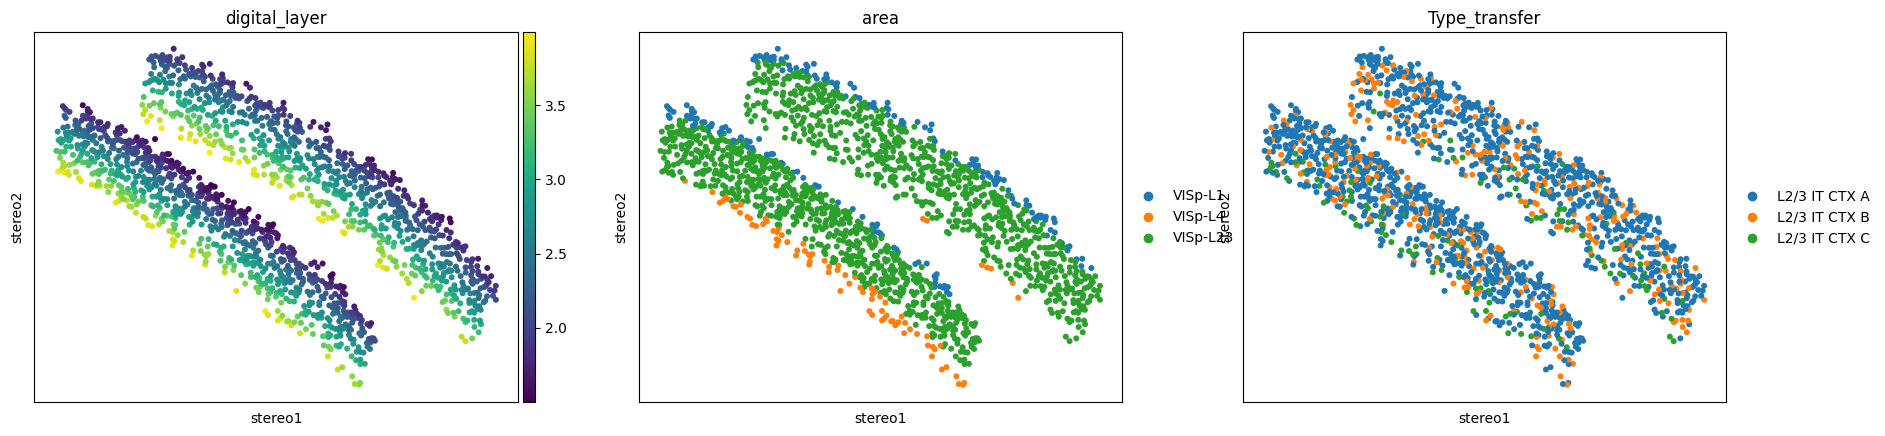

In [114]:
sc.pl.embedding(DR_l23, basis='stereo',color=['digital_layer','area','Type_transfer'],alpha=None)

In [905]:
DR_V1_L23_PC1gene = pd.read_csv('F:/spatial/V1_integration/DR_V1_L23_PC1rank.csv',index_col='Gene')

In [906]:
DR_V1_L23_PC1gene

Empty DataFrame
Columns: []
Index: [Slc25a22, Clec18a, Fgf1, Cyb561a3, Gm28376, Gm2824, Susd1, 4930590L20Rik, Igfbp7, Plcl1, Itpkb, Gm12446, Trps1, Gm16036, Mdga1, Olfm3, Tmem9, Arr3, Hps4, 4930509J09Rik, Gm28905, Gm40293, Ccdc7b, Ubash3b, Sap30l, Ggact, Pcsk5, Klhl1, Gba, Gm15584, Pbx3, Gm47167, B230323A14Rik, Gm47283, Zfp710, Filip1l, Adam33, Cpne4, Col26a1, Ppargc1a, 4933407E24Rik, Tent5d, Hcn1, Gm16189, Unc5c, C030047K22Rik, Nrp1, Slc14a2, Adgrd1, Gm13402, Tmc1, Mamdc2, Lurap1l, Megf11, Gm13912, C2cd2, Pip5k1b, mt-Co2, Doc2b, Adam19, Gpr137c, Ndufaf4, Cpq, mt-Co3, Tll1, Eya1, B230217J21Rik, Gm49906, Gm16337, Plppr1, Vwa3a, Sycp3, Sntg2, Gm15577, Asap2, Gm36146, Col25a1, Gm32036, Fkbp5, Gm50368, Gm16000, Gm765, Ift46, A430090L17Rik, Gm11099, Bzw2, Hs3st4, Nhs, Fst, mt-Nd4, Pcdh15, Myo1e, Zbtb20, Unc13c, Arhgap15, Hccs, Kcnk2, Gm26981, Gm6994, Ptgis, ...]

[765 rows x 0 columns]

In [907]:
adata_index =DR_l23.var.index.astype(str)

In [908]:
PC1_index =DR_V1_L23_PC1gene.index.astype(str)

In [909]:
common_index  =PC1_index.intersection(adata_index)

In [910]:
common_index

Index(['Slc25a22', 'Clec18a', 'Fgf1', 'Cyb561a3', 'Gm28376', 'Gm2824', 'Susd1',
       '4930590L20Rik', 'Igfbp7', 'Plcl1',
       ...
       'Cdh12', 'Rfx3', 'Ptprk', 'Homer1', 'R3hdm1', 'Astn2', 'Robo1', 'Cntn5',
       'Cdh13', 'Epha6'],
      dtype='object', length=731)

In [911]:
DR_l23_PC1 =DR_l23[:,common_index]

In [912]:
# 备份原始数据的 X 矩阵
DR_l23.layers['original_X'] = DR_l23.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR_l23.X = DR_l23.layers['imputed'].copy()
DR_l23.X = np.nan_to_num(DR_l23.X, nan=0)

In [913]:
# 备份原始数据的 X 矩阵
DR_l23_PC1.layers['original_X'] = DR_l23_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR_l23_PC1.X = DR_l23_PC1.layers['imputed'].copy()

In [914]:
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
DR_l23.X = np.nan_to_num(DR_l23.X, nan=0)

In [915]:
DR_l23_PC1.X = np.nan_to_num(DR_l23_PC1.X, nan=0)

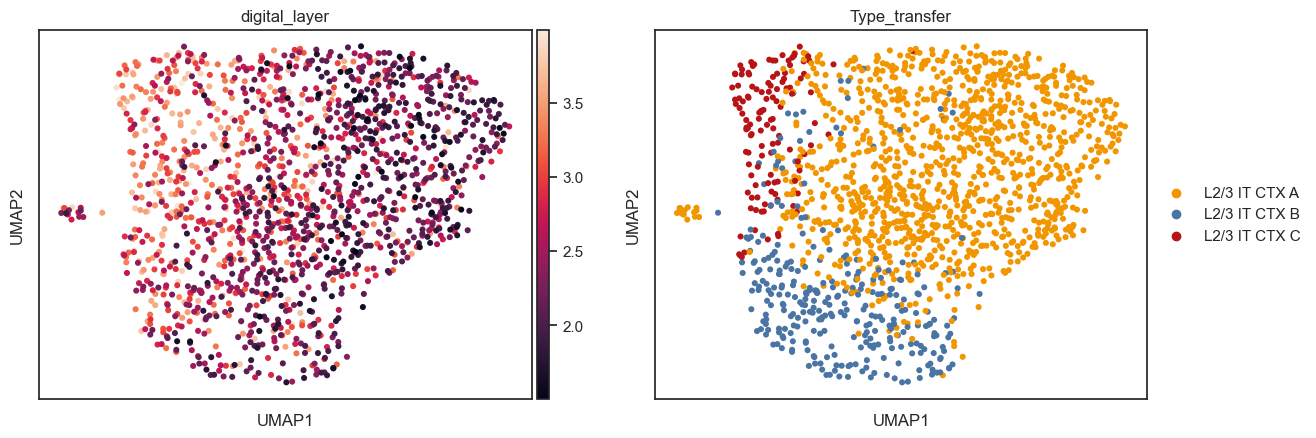

In [936]:
sc.pp.pca(filtered_DR_l23_PC1)
sc.pp.neighbors(filtered_DR_l23_PC1,use_rep='X_pca')
sc.tl.leiden(filtered_DR_l23_PC1)
sc.tl.umap(filtered_DR_l23_PC1)
sc.pl.umap(filtered_DR_l23_PC1, color=['digital_layer','Type_transfer'],palette=["#f29600", "#4974a4", "#b81316"])

In [646]:
D_l23_umap = DR_l23_PC1.obsm['X_umap'][:,1]


In [159]:
np.argmin(D_l23_umap).max(axis=0)

210

In [173]:
D_l23_umap[210]

-2.4101958

In [174]:
D_l23_umapx = DR_l23_PC1.obsm['X_umap'][:,0]
D_l23_umap

array([ 5.6121478e+00,  7.2818124e-01, -4.2253613e-01, ...,
        1.5657728e+00,  1.2542317e+00,  5.2270433e-03], dtype=float32)

In [175]:
D_l23_umapx[210]

4.0313797

In [160]:
DR_l23_PC1[DR_l23_PC1.obs.index[210]].obs 

orig.ident  nCount_Spatial  nFeature_Spatial      area  coor_x  coor_y  \
18447    Spatial           343.0               207  VISp-L23   12387    9915   

      areaL1     coor_x_ad     coor_y_ad left_right  ...   ident  \
18447     V1  12798.506475  11768.335062      right  ...  region   

      integration_partition_transfer integration_partition_confidence  \
18447                            p49                          0.74564   

       Subclass_transfer Subclass_confidence  Type_transfer Type_confidence  \
18447        L2/3 IT CTX                 1.0  L2/3 IT CTX C        0.406324   

       digital_layer  slice leiden  
18447       2.255469  DR1_2      6  

[1 rows x 21 columns]

In [213]:
DR_l23_PC1[DR_l23_PC1.obs.index[861]].obs 

orig.ident  nCount_Spatial  nFeature_Spatial      area  coor_x  coor_y  \
14747    Spatial           598.0               339  VISp-L23   11620   15828   

      areaL1  coor_x_ad  coor_y_ad left_right  ...  \
14747     V1    12365.0    11048.0      right  ...   

      integration_partition_confidence Subclass_transfer Subclass_confidence  \
14747                          0.64897       L2/3 IT CTX                 1.0   

       Type_transfer Type_confidence  digital_layer  slice  leiden  highlight  \
14747  L2/3 IT CTX B        0.776421       2.130415  DR2_2       1      False   

      dpt_pseudotime  
14747        0.83543  

[1 rows x 23 columns]

In [916]:
# Step 1: 获取基因表达数据
g = DR_l23_PC1.X.mean(axis=1).flatten()  # 计算基因表达均值

# Step 2: 计算 vmin 和 vmax
vmin, vmax = np.percentile(g, 1), np.percentile(g, 99)

# Step 3: 创建布尔掩码
mask = (g >= vmin) & (g <= vmax)
filtered_DR_l23_PC1 = DR_l23_PC1[mask]
removed_cells = DR_l23_PC1.obs[~mask].index  # 获取被移除的细胞索引

# Step 5: 在 DR_l23 中去掉相同的细胞
filtered_DR_l23 = DR_l23[~DR_l23.obs.index.isin(removed_cells)]  # 筛选 DR_l23 中的细胞

# 打印结果
print(f"原始 DR_l23_PC1 细胞数: {DR_l23_PC1.n_obs}, 筛选后: {filtered_DR_l23_PC1.n_obs}")
print(f"原始 DR_l23 细胞数: {DR_l23.n_obs}, 筛选后: {filtered_DR_l23.n_obs}")


原始 DR_l23_PC1 细胞数: 1606, 筛选后: 1572
原始 DR_l23 细胞数: 1606, 筛选后: 1570


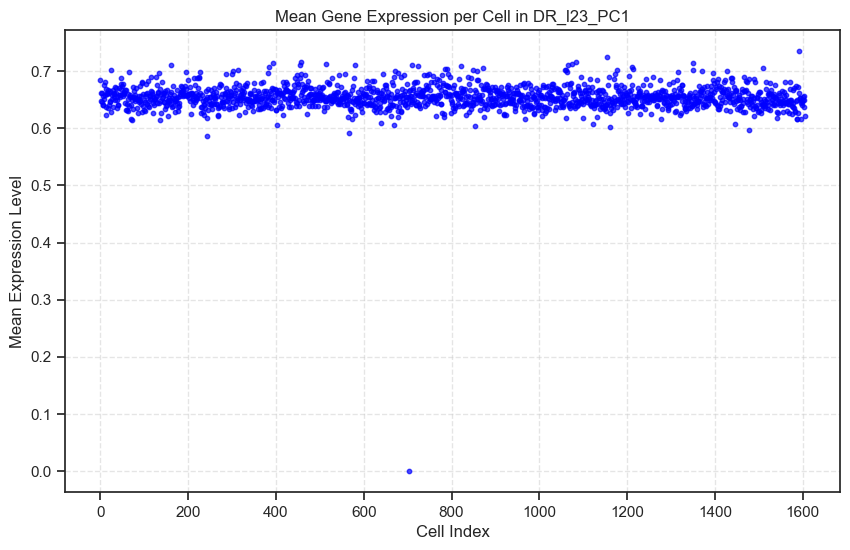

In [917]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = DR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in DR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


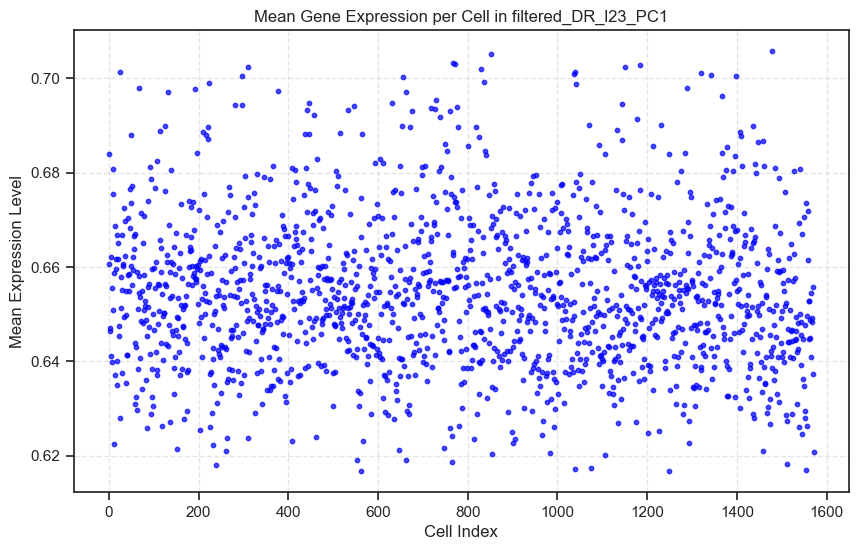

In [918]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = filtered_DR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in filtered_DR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [937]:
sc.tl.diffmap(filtered_DR_l23_PC1)
filtered_DR_l23_PC1.uns['iroot'] = np.flatnonzero(filtered_DR_l23_PC1.obs.index  == '18486')[0]
sc.tl.dpt(filtered_DR_l23_PC1)

saving figure to file ./figures/scvelo_V1_DR_l23_dpt.pdf


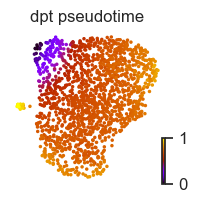

saving figure to file ./figures/scvelo_V1_DR_l23_Type.pdf


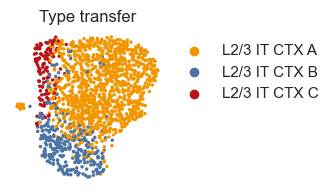

saving figure to file ./figures/scvelo_V1_DR_l23_digital_layer.pdf


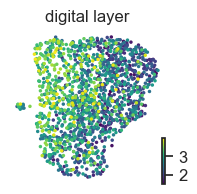

In [940]:
scv.pl.scatter(filtered_DR_l23_PC1, basis='X_umap',color='dpt_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),size=25,save='V1_DR_l23_dpt.pdf')
scv.pl.umap(filtered_DR_l23_PC1, color='Type_transfer',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),size=25,save='V1_DR_l23_Type.pdf')
scv.pl.umap(filtered_DR_l23_PC1, color='digital_layer',cmap='viridis',figsize=(2,2),size=25,save='V1_DR_l23_digital_layer.pdf')

In [123]:
filtered_DR_l23_PC1.write_h5ad('filtered_DR_l23_PC1.h5ad')

In [23]:
filtered_DR_l23_PC1=sc.read_h5ad('filtered_DR_l23_PC1_spatial.h5ad')

In [109]:
adata = filtered_DR_l23_PC1
data_clusters = adata.obs['Type_transfer']
#data_clusters_set = set(data_clusters.values)
#zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
#dict_types = dict(zip_types)
#cell_clusters  =  [dict_types[i] for i in data_clusters.values]
cell_clusters = list(data_clusters.values)
X_pca  = adata.obsm['X_pca']

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_adjusted_g_lineplot.pdf


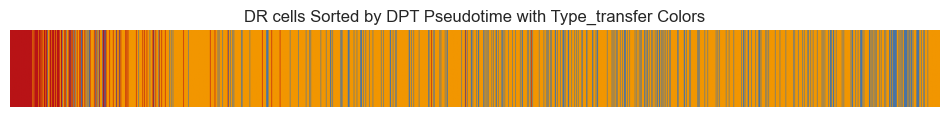

In [992]:
# 将数据导出为 DataFrame，方便操作
df = filtered_DR_l23_PC1.obs[['dpt_pseudotime', 'Type_transfer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 为每个 Type_transfer 设定颜色（可以根据实际需要修改配色）
type_colors = {
    'L2/3 IT CTX A': "#f29600",  # 示例颜色
    'L2/3 IT CTX B': "#4974a4",
    'L2/3 IT CTX C': "#b81316"
}

# 为每个细胞匹配对应的颜色
df_sorted['color'] = df_sorted['Type_transfer'].map(type_colors)
color_rgb = np.array([mcolors.to_rgba(color) for color in df_sorted['color']])

# 将颜色数组 reshape 为 1 行
color_array = color_rgb.reshape(1, -1, 4)  # 4 表示 RGBA 颜色通道

# 绘制条状图
plt.figure(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
plt.imshow(color_array, aspect="auto")
plt.axis("off")  # 去掉轴
plt.title("DR cells Sorted by DPT Pseudotime with Type_transfer Colors")
# 保存为 PDF
#output_path = "V1_DR_cells_sorted_dpt_pseudotime.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()

print(f"PDF saved as {output_path}")
plt.show()

In [25]:


# 将数据导出为 DataFrame，方便操作
df = filtered_DR_l23_PC1.obs[['dpt_pseudotime', 'digital_layer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 创建一个黑白颜色映射
cmap = plt.cm.Greys  # 使用黑白的 'Greys' 颜色映射
norm = mcolors.Normalize(vmin=df_sorted['digital_layer'].min(), vmax=df_sorted['digital_layer'].max())
colors = cmap(norm(df_sorted['digital_layer']))

# 将颜色数组转换为二维数组以用于绘制条状图
color_bar = colors[::-1].reshape(1,-1,4)  # 高度为1，宽度为细胞数量，4是RGBA通道数

# 绘制条状图和颜色图例
fig, ax = plt.subplots(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
im = ax.imshow(color_bar, aspect="auto")  # 确保颜色条为黑白
ax.axis("off")  # 去掉轴
plt.title("DR cells spatial depth along Pseudotime")

# 添加颜色条作为图例，并去掉数值显示
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation="horizontal", pad=0.2)
cbar.set_label('Spatial Depth')  # 自定义颜色条标签
cbar.set_ticks([])  # 去掉颜色条上的数值
# 添加左右侧标签
cbar.ax.text(-0.25, 0.5, 'Upper Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
cbar.ax.text(1.25, 0.5, 'Deep Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
#plt.show()
# 保存为 PDF
output_path = "V1_DR_cortical_depth_dpt_pseudotime.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as V1_DR_cortical_depth_dpt_pseudotime.pdf


In [3]:
NR_l23_PC1=sc.read_h5ad('NR_l23_PC1_spatial.h5ad')

In [4]:
NR_l23_PC1

AnnData object with n_obs × n_vars = 1451 × 866
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'highlight'
    uns: 'Type_transfer_colors', 'diffmap_evals', 'highlight_colors', 'iroot', 'neighbors'
    obsm: 'X_diffmap', 'X_stereo', 'stereo'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

In [31]:
DR_l23_PC1=sc.read_h5ad('DR_l23_PC1_spatial.h5ad')

In [3]:
RP_gene_order_df = pd.read_csv('F:/spatial/V1_integration/V1_L23_RCG_pos_ordered.xls', sep='\t')
RN_gene_order_df = pd.read_csv('F:/spatial/V1_integration/V1_L23_RCG_neg_ordered.xls', sep='\t')
NRP_gene_order_df = pd.read_csv('F:/spatial/V1_integration/V1_L23_Non_RCG_pos_ordered.xls', sep='\t')
NRN_gene_order_df = pd.read_csv('F:/spatial/V1_integration/V1_L23_Non_RCG_neg_ordered.xls', sep='\t')

In [4]:
V1_L23_PC1_df = pd.read_csv('F:/spatial/V1_integration/V1_L23_Lasso_PC1rank.xls', sep='\t')

In [5]:
RP_gene_order_list = RP_gene_order_df['Gene'].tolist()
RN_gene_order_list = RN_gene_order_df['Gene'].tolist()
NRP_gene_order_list = NRP_gene_order_df['Gene'].tolist()
NRN_gene_order_list = NRN_gene_order_df['Gene'].tolist()

In [493]:
RCG_gene_order_df = pd.read_csv('F:/spatial/V1_integration/bin_means_nr_rcg_sorted_slope.xls', sep='\t')
NRCG_gene_order_df = pd.read_csv('F:/spatial/V1_integration/bin_means_dr_non_rcg_sorted_nr_slope_order.xls', sep='\t')

In [494]:
RCG_gene_order_list = RCG_gene_order_df['Gene'].tolist()
NRCG_gene_order_list = NRCG_gene_order_df['Gene'].tolist()

In [191]:
DR_l23_PC1.obs['slice']

12476    DR1_2
12477    DR1_2
12478    DR1_2
12480    DR1_2
13789    DR1_2
         ...  
35282    DR2_2
35283    DR2_2
35284    DR2_2
35286    DR2_2
35289    DR2_2
Name: slice, Length: 1714, dtype: category
Categories (2, object): ['DR1_2', 'DR2_2']

In [919]:
l23_PC1 = NR_l23_PC1.concatenate(DR_l23_PC1,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [920]:
l23 = NR_l23.concatenate(DR_l23,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [878]:
RP_gene_order_set = set(RP_gene_order_list)
RN_gene_order_set = set(RN_gene_order_list)
NRP_gene_order_set = set(NRP_gene_order_list)
NRN_gene_order_set = set(NRN_gene_order_list)

In [195]:
l23_PC1.obs['slice']

74897    NR1_2
74901    NR1_2
74931    NR1_2
74935    NR1_2
74941    NR1_2
         ...  
35282    DR2_2
35283    DR2_2
35284    DR2_2
35286    DR2_2
35289    DR2_2
Name: slice, Length: 3165, dtype: category
Categories (4, object): ['DR1_2', 'DR2_2', 'NR1_2', 'NR2_2']

In [356]:
NI_l23 = NR_l23.concatenate(DR_l23,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [359]:
NI_l23

AnnData object with n_obs × n_vars = 3165 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition', 'RCG_pos_pos_expression', 'RCG_pos_neg_expression', 'RCG_neg_pos_expression', 'RCG_neg_neg_expression', 'Non_RCG_pos_pos_expression', 'Non_RCG_pos_neg_expression', 'Non_RCG_neg_pos_expression', 'Non_RCG_neg_neg_expression'
    obsm: 'stereo'
    layers: 'imputed'

In [421]:
import pandas as pd
import numpy as np

# 定义函数：进一步筛选每个 geneset 的基因
def refine_geneset(df, geneset, slope_condition):
    """
    从基因集进一步筛选符合条件的基因：
    - NR_slpoe > 0: 筛选 logFC 绝对值最大，同时 NR_slpoe 绝对值最大的前 10 个基因
    - NR_slpoe < 0: 筛选 logFC 绝对值最大，同时 NR_slpoe 绝对值最大的前 10 个基因
    """
    # 根据条件筛选 geneset 中的基因
    filtered_df = df[df['Gene'].isin(geneset) & slope_condition]
    
    # 排序并取前 10 个基因
    sorted_df = filtered_df.copy()
    sorted_df['logFC_abs'] = np.abs(sorted_df['logFC'])  # 计算 logFC 的绝对值
    sorted_df['NR_slpoe_abs'] = np.abs(sorted_df['NR_slpoe'])  # 计算 NR_slpoe 的绝对值

    # 根据 logFC_abs 和 NR_slpoe_abs 排序
    sorted_df = sorted_df.sort_values(by=['logFC_abs', 'NR_slpoe_abs'], ascending=[False, False])
    
    # 返回原始的列
    return sorted_df.head(10)[['Gene', 'NR_slpoe', 'logFC']]

# 初始化新的基因集字典
refined_genesets = {}

# 遍历现有的 8 个基因集，进一步筛选
for geneset_name, geneset in genesets.items():
    if "pos" in geneset_name:  # NR_slpoe > 0 的情况
        condition = V1_L23_PC1_df['NR_slpoe'] > 0
    elif "neg" in geneset_name:  # NR_slpoe < 0 的情况
        condition = V1_L23_PC1_df['NR_slpoe'] < 0
    else:
        continue

    # 筛选出符合条件的基因
    refined_genes = refine_geneset(V1_L23_PC1_df, geneset, condition)
    
    # 将结果存入字典
    refined_genesets[geneset_name] = refined_genes

# 展示每个 geneset 的筛选结果
for name, df in refined_genesets.items():
    print(f"Geneset: {name}")
    print(df)
    print('-' * 40)


Geneset: RP_pos
        Gene  NR_slpoe     logFC
730   Cacnb2  0.002239  6.756692
648    Gria1  0.002969  6.539880
286   Prkag2  0.001949  5.776320
598   Pcdh15  0.000644  5.720477
994  Zdhhc14  0.003109  5.426986
323    Syt17  0.001496  5.366232
981   Sorcs2  0.001995  5.279644
757     Otof  0.001521  5.238224
486  Slc16a2  0.001152  5.197961
843  Gm15398  0.001739  5.164189
----------------------------------------
Geneset: RP_neg
       Gene  NR_slpoe     logFC
334  Slc9a9 -0.002416  7.011949
568  Igsf9b -0.002170  5.921751
126  Sorcs3 -0.001200  5.722466
714   Rph3a -0.001227  5.662364
239   Prmt8 -0.000280  5.474292
740   Ephb1 -0.002015  5.336788
213   Lin7a -0.001706  5.265705
372   Cpne9 -0.001549  4.776320
562  Brinp3 -0.003364  4.484200
749    Fgf1 -0.001338  4.457557
----------------------------------------
Geneset: RN_pos
         Gene  NR_slpoe     logFC
636     Hdac9  0.002616 -7.211257
404      Ano3  0.001236 -6.644217
576     Ptprn  0.000618 -5.776320
115      Numb  0.00

In [116]:
sc.pp.pca(filtered_NR_l23_PC1)

In [117]:
filtered_NR_l23_PC1

AnnData object with n_obs × n_vars = 1245 × 866
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'diff_time', 'dtne_cluster'
    uns: 'Type_transfer_colors', 'area_colors', 'diffmap_evals', 'iroot', 'neighbors', 'pca', 'umap', 'dtne_cluster_colors'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'stereo', 'DTNE', 'X_DTNE'
    varm: 'PCs'
    layers: 'imputed', 'original_X'
    obsp: 'connectivities', 'distances'

In [78]:
filtered_NR_l23_PC1.obs['PC1']= filtered_NR_l23_PC1.obsm['X_pca'][:,0]

In [79]:
filtered_NR_l23_PC1_2 = filtered_NR_l23_PC1[filtered_NR_l23_PC1.obs['slice']=='NR1_2']

filtered_NR_l23_PC2_2 = filtered_NR_l23_PC1[filtered_NR_l23_PC1.obs['slice']=='NR2_2']

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


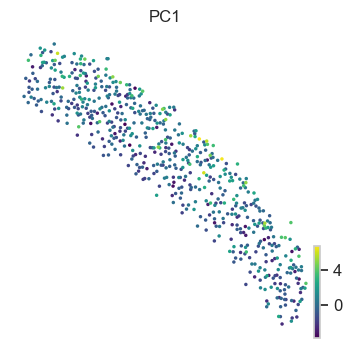

In [120]:
scv.pl.scatter(filtered_NR_l23_PC1_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=25)

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


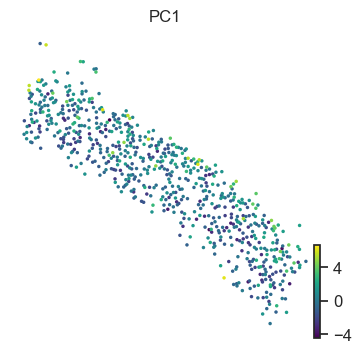

In [338]:
scv.pl.scatter(filtered_NR_l23_PC2_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=25)

In [964]:
filtered_l23_PC1 = filtered_NR_l23_PC1.concatenate(filtered_DR_l23_PC1,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [965]:
filtered_l23_PC1.write_h5ad('filtered_l23_PC1_4.h5ad')

In [121]:
sc.pp.pca(filtered_DR_l23_PC1)

In [80]:
filtered_DR_l23_PC1.obs['PC1']= filtered_DR_l23_PC1.obsm['X_pca'][:,0]

In [81]:
filtered_DR_l23_PC1_2 = filtered_DR_l23_PC1[filtered_DR_l23_PC1.obs['slice']=='DR1_2']

filtered_DR_l23_PC2_2 = filtered_DR_l23_PC1[filtered_DR_l23_PC1.obs['slice']=='DR2_2']

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


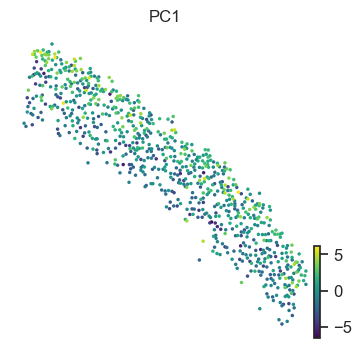

In [344]:
scv.pl.scatter(filtered_DR_l23_PC1_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=25)

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


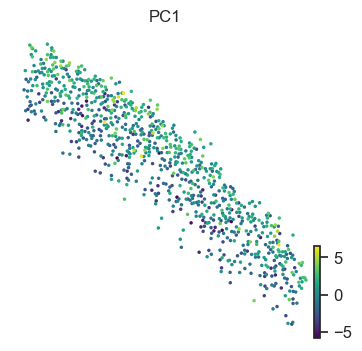

In [345]:
scv.pl.scatter(filtered_DR_l23_PC2_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=25)

In [115]:
l23 = NR_l23.concatenate(DR_l23,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

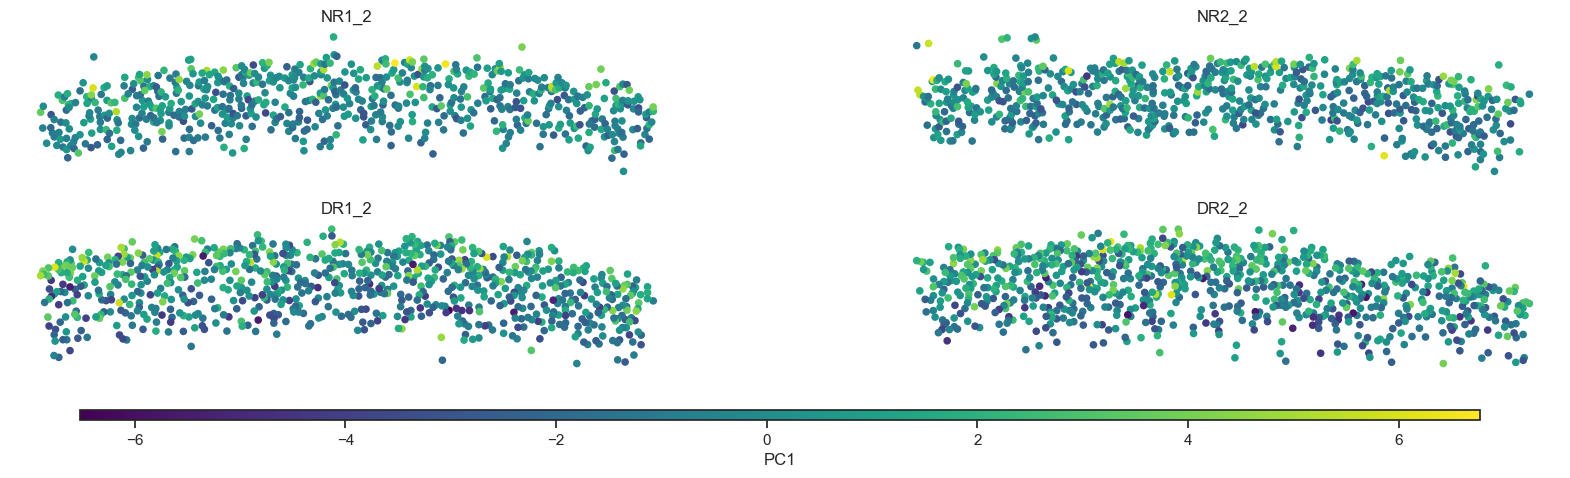

In [478]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvelo as scv

# 假设数据已经加载到 adata 中
adata = filtered_l23_PC1

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图，4个子图分别显示每个 slice
fig, axes = plt.subplots(2, 2, figsize=(20,5))  # 增加图像高度，确保有足够空间

# 设置旋转角度为 22.5 度
angle = -22.5  # 逆时针旋转 22.5 度
angle_rad = np.deg2rad(angle)  # 角度转换为弧度

# 旋转矩阵（逆时针旋转 22.5 度）
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])  # 旋转矩阵

# Step 1: 设置全局的 colorbar 范围
# 获取所有 slice 的 'PC1' 数据的最大值和最小值，用于设置 vmin 和 vmax
pc1_min = np.min(adata.obs['PC1'])
pc1_max = np.max(adata.obs['PC1'])

# 为每个 slice 绘制图形
for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取当前 slice 的 'stereo' 坐标数据
    umap_coords = subset.obsm['stereo']  # 获取 UMAP 坐标数据
    
    # Step 2: 将坐标平移，使得图像围绕原点旋转
    x_shift = umap_coords[:, 0].max()  # x 轴最大值
    y_shift = umap_coords[:, 1].min()  # y 轴最小值
    
    # 平移坐标系
    translated_coords = umap_coords - [x_shift, y_shift]
    
    # Step 3: 应用旋转矩阵
    rotated_coords = translated_coords.dot(rotation_matrix)  # 应用旋转矩阵
    
    # Step 4: 将平移后的坐标恢复
    final_coords = rotated_coords + [x_shift, y_shift]

    # 将旋转后的坐标存储回 AnnData 对象的 obsm 中
    subset.obsm['stereo_rotated'] = final_coords  # 存储旋转后的坐标

    # Step 5: 使用 matplotlib 手动绘制散点图
    scatter = ax.scatter(final_coords[:, 0], final_coords[:, 1], c=subset.obs['PC1'], cmap='viridis',
                         vmin=pc1_min, vmax=pc1_max, s=20)
    ax.set_title(slice_category)
    
    # Hide the axis
    ax.axis('off')  # 隐藏坐标轴

# Step 6: 添加全局 colorbar
# 创建一个空的 axis 用于 colorbar
cbar_ax = fig.add_axes([0.16, 0.1, 0.7, 0.02])  # 修改 colorbar 位置，确保它位于底部
fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_xlabel('PC1')  # colorbar 的标签

# 调整子图布局，确保子图和 colorbar 不重叠
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)  # 增加 bottom 参数，确保 colorbar 不遮挡

# 显示图形
plt.show()


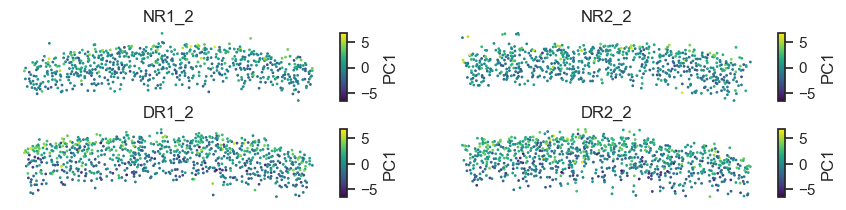

In [590]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvelo as scv

# 假设数据已经加载到 adata 中
adata = filtered_l23_PC1

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图，4个子图分别显示每个 slice
fig, axes = plt.subplots(2, 2, figsize=(10,2.5))  # 增加图像高度，确保有足够空间

# 设置旋转角度为 22.5 度
angle = -22.5  # 逆时针旋转 22.5 度
angle_rad = np.deg2rad(angle)  # 角度转换为弧度

# 旋转矩阵（逆时针旋转 22.5 度）
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])  # 旋转矩阵

# 为每个 slice 绘制图形
for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取当前 slice 的 'stereo' 坐标数据
    umap_coords = subset.obsm['stereo']  # 获取 UMAP 坐标数据
    
    # Step 2: 将坐标平移，使得图像围绕原点旋转
    x_shift = umap_coords[:, 0].max()  # x 轴最大值
    y_shift = umap_coords[:, 1].min()  # y 轴最小值
    
    # 平移坐标系
    translated_coords = umap_coords - [x_shift, y_shift]
    
    # Step 3: 应用旋转矩阵
    rotated_coords = translated_coords.dot(rotation_matrix)  # 应用旋转矩阵
    
    # Step 4: 将平移后的坐标恢复
    final_coords = rotated_coords + [x_shift, y_shift]

    # 将旋转后的坐标存储回 AnnData 对象的 obsm 中
    subset.obsm['stereo_rotated'] = final_coords  # 存储旋转后的坐标

    # Step 5: 使用 matplotlib 手动绘制旋转后的散点图
    scatter = ax.scatter(final_coords[:, 0], final_coords[:, 1], c=subset.obs['PC1'], cmap='viridis',
                         vmin=np.min(adata.obs['PC1']), vmax=np.max(adata.obs['PC1']), s=1)
    ax.set_title(slice_category)
    
    # Hide the axis
    ax.axis('off')  # 隐藏坐标轴

    # Step 6: 添加单独的 colorbar
    cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04,aspect=10)  # 竖直 colorbar
    cbar.set_label('PC1')  # colorbar 的标签

# 调整子图布局，确保子图和 colorbar 不重叠
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)  # 增加 bottom 参数，确保 colorbar 不遮挡

# 显示图形
plt.show()


In [68]:
adata = filtered_l23_PC1_shifted

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# Step 1: 分别展示每个 slice 的散点图，并设置对应 colorbar 的最大值和最小值
fig, axes = plt.subplots(2, 2, figsize=(5, 4))

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 计算当前 slice 的 PC1 的最小值和最大值
    pc1_slice_min = subset.obs['PC1'].min()
    pc1_slice_max = subset.obs['PC1'].max()
    
    # 绘制当前 slice 的散点图，colorbar 范围为该 slice 的 PC1 最小值和最大值
    scv.pl.scatter(subset, basis='stereo_rotated', color='PC1', cmap='viridis', 
                   vmin=pc1_slice_min, vmax=pc1_slice_max,  # 设置当前 slice 的 colorbar 范围
                    ax=ax, show=False, 
                   size=20, title=slice_category)
    
    # 获取 colorbar 对象
    cbar = ax.collections[0].colorbar
    # 设置 colorbar 的 ticks 为当前 slice 的最小值和最大值
    cbar.set_ticks([pc1_slice_min, pc1_slice_max])
    
    # 设置 colorbar 的标签
    cbar.set_label('PC1', fontsize=8)  # 设置 colorbar 标签字体大小

    # 调整刻度标签的字体大小
    cbar.ax.tick_params(labelsize=8)  # 设置刻度标签的字体大小
    # 设置 title 的字体大小
    ax.set_title(slice_category, fontsize=10)  # 设置 title 字体大小

# 调整子图布局
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)
# 显示图形
#plt.show()
# 保存为 PDF
output_path = "V1_l23_PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")






Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
PDF saved as V1_l23_PC1.pdf


Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).


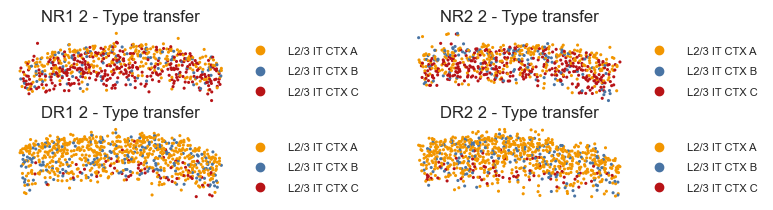

In [622]:
import scvelo as scv
import matplotlib.pyplot as plt
adata = filtered_l23_PC1_shifted
# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']


# 创建子图布局
fig, axes = plt.subplots(2, 2, figsize=(8, 2.5))

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取 'Type_transfer' 列数据
    type_transfer_values = subset.obs['Type_transfer']
    
    # 绘制当前 slice 的 'Type_transfer' 的散点图
    scv.pl.scatter(subset, basis='stereo_rotated', color='Type_transfer', 
                    ax=ax, show=False, 
                   size=20, title=f'{slice_category} - Type_transfer',palette=["#f29600", "#4974a4", "#b81316"])

    # 获取当前图例对象
    legend = ax.get_legend()
    # 设置图例字体大小
    if legend is not None:
        for label in legend.get_texts():
            label.set_fontsize(8)  # 设置字体大小

# 调整子图布局
plt.subplots_adjust(hspace=0.3, wspace=0.8, bottom=0.2)

# 显示图形
plt.show()


In [1045]:
filtered_l23_PC1_shiftedc=filtered_l23_PC1_shifted

In [ ]:
DR2_2r=sc.read_h5ad('DR2_2r.h5ad')
NR2_2r=sc.read_h5ad('NR2_2r.h5ad')
DR1_2r=sc.read_h5ad('DR1_2r.h5ad')
NR1_2r=sc.read_h5ad('NR1_2r.h5ad')

In [13]:
V1 = NR1_2r.concatenate(NR2_2r,DR1_2r,DR2_2r,batch_categories=['NR1_2','NR2_2','DR1_2','DR2_2'],batch_key='slice',index_unique=None,join='outer')

In [14]:
csv_file_path = 'F:\spatial\V1_integration\V1_NR_DR_predcell_freq5_8.csv'

# 读取 CSV 文件，并设置 'cell_id' 列为 index
all_spatial = pd.read_csv(csv_file_path, index_col='cell_id')
all_spatial_index = all_spatial.index.astype(str)
adata_index =V1.obs.index.astype(str)

common_index = all_spatial_index.intersection(adata_index)

# Ensure the indices are of the same type (e.g., strings)

common_index = common_index.astype(str)
print(common_index)

Index(['30468', '30472', '30473', '30475', '30476', '30477', '30495', '30496',
       '30497', '30499',
       ...
       '38695', '38721', '38722', '38723', '38725', '38727', '38728', '38730',
       '38733', '38734'],
      dtype='object', length=18564)


In [16]:
# 确保 all_spatial.index 和 common_index 都是字符串类型
all_spatial_index = all_spatial.index.astype(str)

# 打印两个索引，检查它们的内容
print("common_index:")
print(common_index)
print("all_spatial_index:")
print(all_spatial_index)

# 找到 common_index 和 all_spatial.index 中的交集
valid_index = common_index.intersection(all_spatial_index)

# 打印交集部分的内容，确保它们正确
print(f"Valid index: {valid_index}")

# 使用 isin() 方法筛选数据，避免直接索引错误
spatial_common = all_spatial[all_spatial_index.isin(valid_index)]

# 查看结果
print(spatial_common)


common_index:
Index(['30468', '30472', '30473', '30475', '30476', '30477', '30495', '30496',
       '30497', '30499',
       ...
       '38695', '38721', '38722', '38723', '38725', '38727', '38728', '38730',
       '38733', '38734'],
      dtype='object', length=18564)
all_spatial_index:
Index(['30468', '30472', '30473', '30475', '30476', '30477', '30495', '30496',
       '30497', '30499',
       ...
       '38695', '38721', '38722', '38723', '38725', '38727', '38728', '38730',
       '38733', '38734'],
      dtype='object', name='cell_id', length=24626)
Valid index: Index(['30468', '30472', '30473', '30475', '30476', '30477', '30495', '30496',
       '30497', '30499',
       ...
       '38695', '38721', '38722', '38723', '38725', '38727', '38728', '38730',
       '38733', '38734'],
      dtype='object', length=18564)
          Unnamed: 0 orig.ident  nCount_Spatial  nFeature_Spatial      area  \
cell_id                                                                       
30468    NR1

In [18]:
spatial_common = spatial_common.loc[~spatial_common.index.duplicated()]

In [19]:
# 将索引转换为字符串类型
V1.obs.index = V1.obs.index.astype(str)
spatial_common.index = spatial_common.index.astype(str)

# 重置索引并合并
V1_obs_reset = V1.obs.reset_index()
spatial_common_reset = spatial_common.reset_index()

# 合并时使用对应的列
merged_df = V1_obs_reset.merge(
    spatial_common_reset[['cell_id', 'predcell_6']], 
    left_on='index', 
    right_on='cell_id', 
    how='left'
)
merged_df.set_index('index', inplace=True)
# 将合并结果存入 'RCTD' 列
V1.obs['RCTD'] = merged_df['predcell_6']

# 查看结果
print(V1.obs[['RCTD']].head())


              RCTD
72918  L6.CT.CTX.0
72920        Astro
72925          NaN
72941  L6.CT.CTX.2
72943  L6.CT.CTX.0


In [14]:
l23_PC1_shifted.write_h5ad('l23_PC1_shifted_RCTD.h5ad')

In [20]:
V1.write_h5ad('V1_shifted_RCTD.h5ad')

In [1068]:
# 提取 'RCTD' 列等于 'L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C' 的细胞
subset_l23 = filtered_l23_PC1_shiftedc[filtered_l23_PC1_shiftedc.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 查看结果
print(subset_l23)

View of AnnData object with n_obs × n_vars = 1531 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'PC1', 'leiden', 'condition', 'RCTD'
    obsm: 'stereo', 'X_pca', 'X_umap', 'X_diffmap', 'stereo_rotated'
    layers: 'imputed', 'original_X'


In [5]:
adata=sc.read_h5ad('l23_1_4.h5ad')

In [23]:
V1

AnnData object with n_obs × n_vars = 19067 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'RCTD'
    obsm: 'X_rotated', 'stereo'
    layers: 'imputed'

Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).


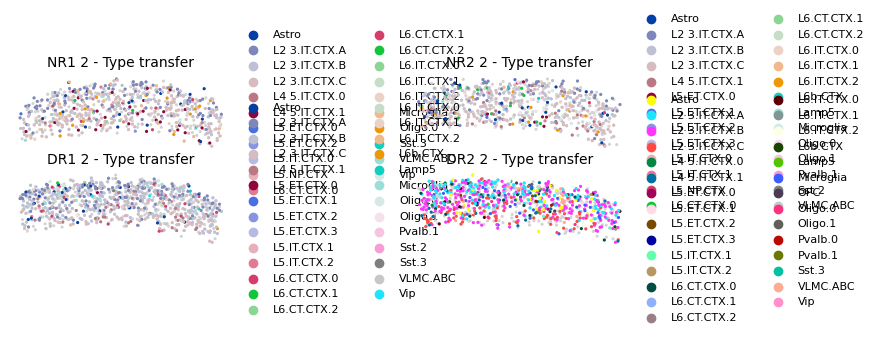

In [15]:
import scvelo as scv
import matplotlib.pyplot as plt

adata = l23_PC1_shifted

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图布局
fig, axes = plt.subplots(2, 2, figsize=(8, 2.5))

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取 'RCTD' 列数据
    type_transfer_values = subset.obs['RCTD']
    
    # 绘制当前 slice 的 'RCTD' 的散点图，去掉细胞上的标签
    scv.pl.scatter(subset, basis='stereo_rotated', color='RCTD', 
                    ax=ax, show=False, 
                    size=20, title=f'{slice_category} - Type_transfer',
                    legend_loc='right', legend_fontsize=8)

    # 获取当前图例对象
    legend = ax.get_legend()
    if legend is not None:
        for label in legend.get_texts():
            label.set_fontsize(8)  # 设置图例字体大小

# 调整子图布局
plt.subplots_adjust(hspace=0.3, wspace=0.8, bottom=0.2)

# 显示图形
plt.show()


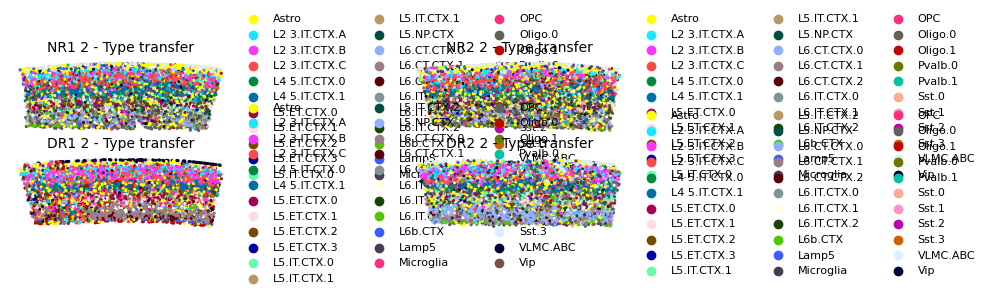

In [24]:
import scvelo as scv
import matplotlib.pyplot as plt

adata = V1

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图布局
fig, axes = plt.subplots(2, 2, figsize=(8, 2.5))

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取 'RCTD' 列数据
    type_transfer_values = subset.obs['RCTD']
    
    # 绘制当前 slice 的 'RCTD' 的散点图，去掉细胞上的标签
    scv.pl.scatter(subset, basis='X_rotated', color='RCTD', 
                    ax=ax, show=False, 
                    size=20, title=f'{slice_category} - Type_transfer',
                    legend_loc='right', legend_fontsize=8)

    # 获取当前图例对象
    legend = ax.get_legend()
    if legend is not None:
        for label in legend.get_texts():
            label.set_fontsize(8)  # 设置图例字体大小

# 调整子图布局
plt.subplots_adjust(hspace=0.3, wspace=0.8, bottom=0.2)

# 显示图形
plt.show()


In [1067]:
filtered_l23_PC1_shiftedc

AnnData object with n_obs × n_vars = 2817 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'PC1', 'leiden', 'condition', 'RCTD'
    obsm: 'stereo', 'X_pca', 'X_umap', 'X_diffmap', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [619]:
filtered_l23_PC1_shifted.obs['Type_transfer']

74897    NaN
74901    NaN
74931    NaN
74935    NaN
74941    NaN
        ... 
35282    NaN
35283    NaN
35284    NaN
35286    NaN
35289    NaN
Name: Type_transfer, Length: 3005, dtype: category
Categories (3, object): ['L2/3 IT CTX A' < 'L2/3 IT CTX B' < 'L2/3 IT CTX C']

In [ ]:
adata.write_h5ad('filtered_l23_PC1_shifted.h5ad')

filtered_l23_PC1_shifted=adata

In [63]:
filtered_l23_PC1_shifted=sc.read_h5ad('filtered_l23_PC1_shifted.h5ad')

In [969]:
filtered_l23_PC1_shifted

AnnData object with n_obs × n_vars = 2817 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'PC1', 'leiden', 'condition'
    obsm: 'stereo', 'X_pca', 'X_umap', 'X_diffmap', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [11]:
NR

AnnData object with n_obs × n_vars = 9380 × 26636
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice'
    uns: 'area_colors', 'Type_transfer_colors'
    obsm: 'stereo'
    layers: 'imputed'

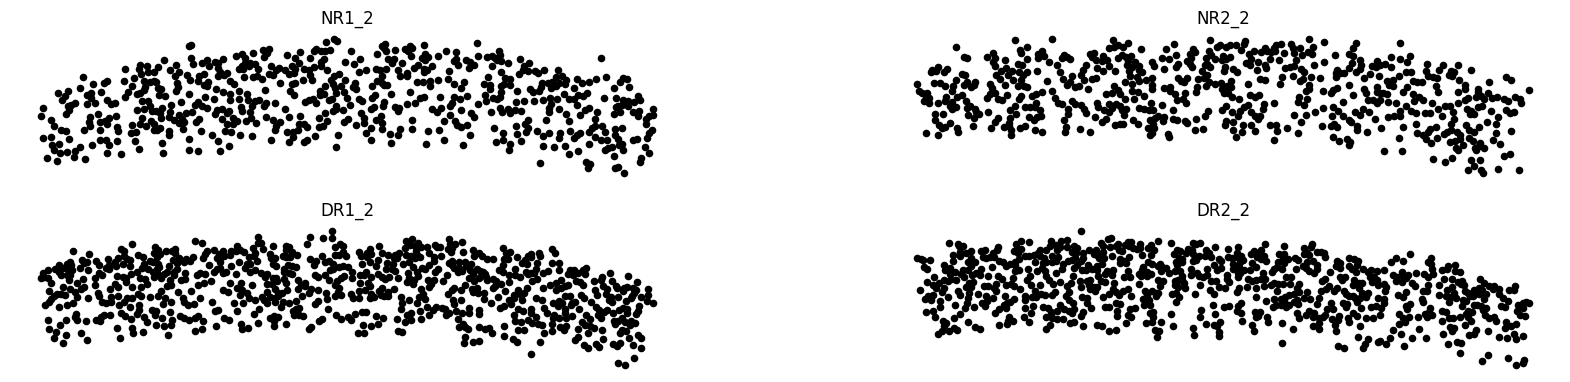

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvelo as scv

# 假设数据已经加载到 adata 中
adata = l23

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图，4个子图分别显示每个 slice
fig, axes = plt.subplots(2, 2, figsize=(20,5))  # 增加图像高度，确保有足够空间

# 设置旋转角度为 22.5 度
angle = -22.5  # 逆时针旋转 22.5 度
angle_rad = np.deg2rad(angle)  # 角度转换为弧度

# 旋转矩阵（逆时针旋转 22.5 度）
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])  # 旋转矩阵

# 存储每个 slice 对应的旋转后的坐标
rotated_coords_dict = {}

# 为每个 slice 绘制图形
for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取当前 slice 的 'stereo' 坐标数据
    umap_coords = subset.obsm['stereo']  # 获取 UMAP 坐标数据
    
    # Step 2: 将坐标平移，使得图像围绕原点旋转
    x_shift = umap_coords[:, 0].max()  # x 轴最大值
    y_shift = umap_coords[:, 1].min()  # y 轴最小值
    
    # 平移坐标系
    translated_coords = umap_coords - [x_shift, y_shift]
    
    # Step 3: 应用旋转矩阵
    rotated_coords = translated_coords.dot(rotation_matrix)  # 应用旋转矩阵
    
    # Step 4: 将平移后的坐标恢复
    final_coords = rotated_coords + [x_shift, y_shift]

    # 存储旋转后的坐标到字典中
    rotated_coords_dict[slice_category] = final_coords  # 以 slice_category 为键，存储旋转后的坐标

    # Step 5: 使用 matplotlib 手动绘制旋转后的散点图，不显示 PC1
    ax.scatter(final_coords[:, 0], final_coords[:, 1], c='black', s=20)  # 使用黑色绘制点
    ax.set_title(slice_category)
    
    # Hide the axis
    ax.axis('off')  # 隐藏坐标轴

# 将每个 slice 的旋转后的坐标合并，并存储回 adata.obsm
# 将所有 slice 的旋转后的坐标按顺序拼接成一个大的坐标数组
all_rotated_coords = np.vstack([rotated_coords_dict[slice_category] for slice_category in slice_categories])

# 将所有旋转后的坐标存储回 AnnData 对象的 obsm 中
adata.obsm['stereo_rotated'] = all_rotated_coords  # 存储所有旋转后的坐标

# 调整子图布局，确保子图和 colorbar 不重叠
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)  # 增加 bottom 参数，确保 colorbar 不遮挡

# 显示图形
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvelo as scv

# 假设数据已经加载到 adata 中
adata = l23

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图，4个子图分别显示每个 slice
fig, axes = plt.subplots(2, 2, figsize=(20,5))  # 增加图像高度，确保有足够空间

# 设置旋转角度为 22.5 度
angle = -22.5  # 逆时针旋转 22.5 度
angle_rad = np.deg2rad(angle)  # 角度转换为弧度

# 旋转矩阵（逆时针旋转 22.5 度）
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])  # 旋转矩阵

# 存储每个 slice 对应的旋转后的坐标
rotated_coords_dict = {}

# 为每个 slice 绘制图形
for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取当前 slice 的 'stereo' 坐标数据
    umap_coords = subset.obsm['stereo']  # 获取 UMAP 坐标数据
    
    # Step 2: 将坐标平移，使得图像围绕原点旋转
    x_shift = umap_coords[:, 0].max()  # x 轴最大值
    y_shift = umap_coords[:, 1].min()  # y 轴最小值
    
    # 平移坐标系
    translated_coords = umap_coords - [x_shift, y_shift]
    
    # Step 3: 应用旋转矩阵
    rotated_coords = translated_coords.dot(rotation_matrix)  # 应用旋转矩阵
    
    # Step 4: 将平移后的坐标恢复
    final_coords = rotated_coords + [x_shift, y_shift]

    # 存储旋转后的坐标到字典中
    rotated_coords_dict[slice_category] = final_coords  # 以 slice_category 为键，存储旋转后的坐标

    # Step 5: 使用 matplotlib 手动绘制旋转后的散点图，不显示 PC1
    ax.scatter(final_coords[:, 0], final_coords[:, 1], c='black', s=20)  # 使用黑色绘制点
    ax.set_title(slice_category)
    
    # Hide the axis
    ax.axis('off')  # 隐藏坐标轴

# 将每个 slice 的旋转后的坐标合并，并存储回 adata.obsm
# 将所有 slice 的旋转后的坐标按顺序拼接成一个大的坐标数组
all_rotated_coords = np.vstack([rotated_coords_dict[slice_category] for slice_category in slice_categories])

# 将所有旋转后的坐标存储回 AnnData 对象的 obsm 中
adata.obsm['stereo_rotated'] = all_rotated_coords  # 存储所有旋转后的坐标

# 调整子图布局，确保子图和 colorbar 不重叠
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)  # 增加 bottom 参数，确保 colorbar 不遮挡

# 显示图形
plt.show()


In [116]:
l23

AnnData object with n_obs × n_vars = 2877 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition'
    obsm: 'stereo'
    layers: 'imputed', 'original_X'

In [119]:
adata.write_h5ad('l23_shifted_1_4.h5ad')
l23.write_h5ad('l23_1_4.h5ad')
l23_shifted =adata

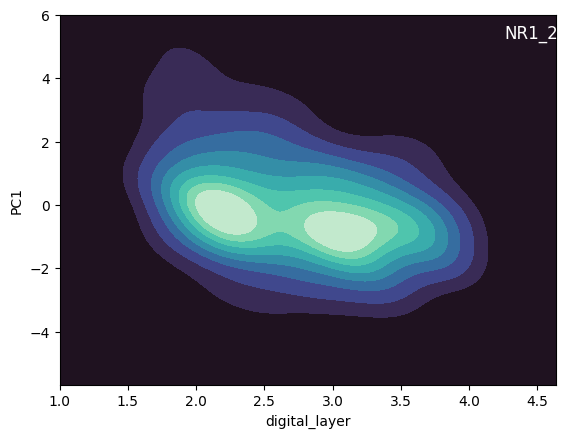

In [82]:
sns.kdeplot(
    data=filtered_NR_l23_PC1_2.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 5.0), (-6, 6)))
plt.text(0.95, 0.95, 'NR1_2', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()

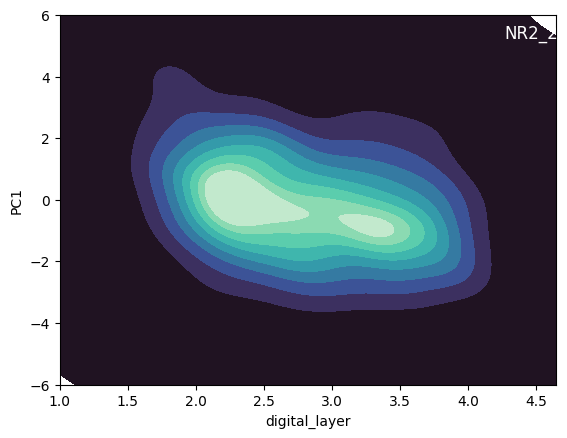

In [83]:
sns.kdeplot(
    data=filtered_NR_l23_PC2_2.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 5), (-6, 6)))
plt.text(0.95, 0.95, 'NR2_2', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()

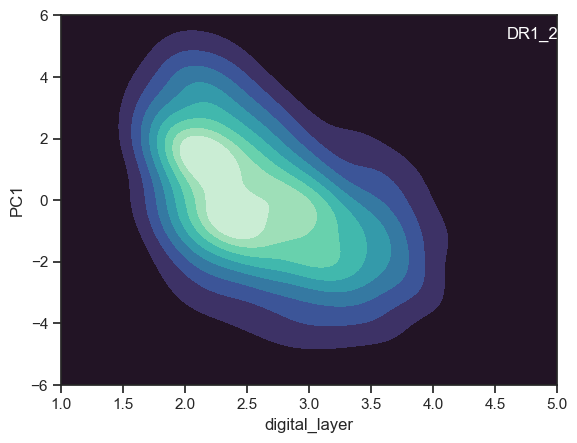

In [376]:
sns.kdeplot(
    data=filtered_DR_l23_PC1_2.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 5), (-6, 6)))
plt.text(0.95, 0.95, 'DR1_2', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()

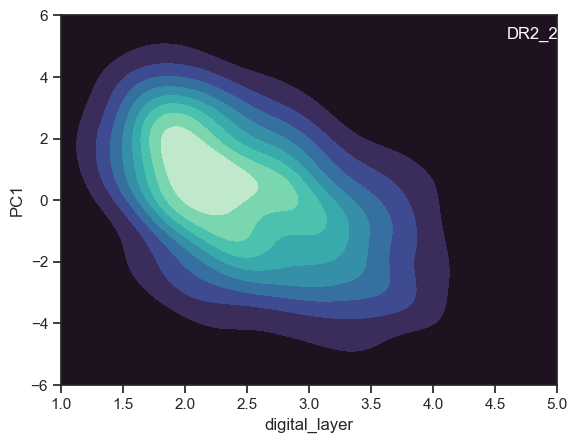

In [377]:
sns.kdeplot(
    data=filtered_DR_l23_PC2_2.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 5), (-6, 6)))
plt.text(0.95, 0.95, 'DR2_2', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()

In [ ]:
filtered_NR_l23_PC1

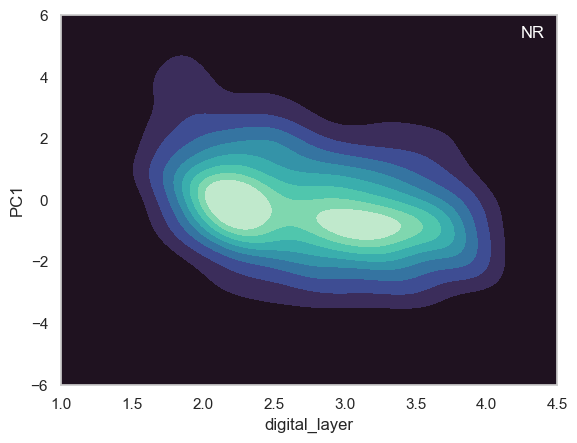

In [126]:
sns.kdeplot(
    data=filtered_NR_l23_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 4.5), (-6, 6)))
plt.text(0.95, 0.95, 'NR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()
#output_path = "F:/spatial/V1_integration/NR_V/figures/V1_NR_l23_digital_layer&PC1.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()

#print(f"PDF saved as {output_path}")

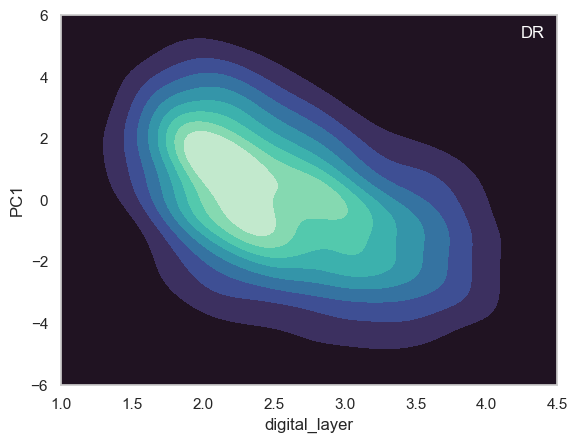

In [127]:
sns.kdeplot(
    data=filtered_DR_l23_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1, 4.5), (-6, 6)))
plt.text(0.95, 0.95, 'DR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
plt.show()
#output_path = "F:/spatial/V1_integration/NR_V/figures/V1_DR_l23_digital_layer&PC1.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()

#print(f"PDF saved as {output_path}")

In [1070]:
subset_NR_l23_PC1=subset_l23[subset_l23.obs['condition']=='NR']

In [1071]:
subset_NR_l23_PC1

View of AnnData object with n_obs × n_vars = 662 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'PC1', 'leiden', 'condition', 'RCTD'
    obsm: 'stereo', 'X_pca', 'X_umap', 'X_diffmap', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [1072]:
subset_DR_l23_PC1=subset_l23[subset_l23.obs['condition']=='DR']

In [1073]:
subset_DR_l23_PC1

View of AnnData object with n_obs × n_vars = 869 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'PC1', 'leiden', 'condition', 'RCTD'
    obsm: 'stereo', 'X_pca', 'X_umap', 'X_diffmap', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [757]:
l23_PC1_shifted.write_h5ad('l23_PC1_shifted_4_5.h5ad')

In [739]:
l23_PC1_shifted

AnnData object with n_obs × n_vars = 3067 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition'
    obsm: 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        V1_L23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
n_rows, n_cols = len(genesets), len(slice_categories)

# 创建绘图布局，关闭 constrained_layout 使用自定义调整
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# 用于存储颜色范围
global_min, global_max = float('inf'), float('-inf')

for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    if not geneset:
        for ax in axs[row_idx, :]:
            ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 g 值并缩放
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)
            g_clipped = np.clip(g, vmin, vmax)
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)
            slice_g_values[slice_category] = (g_norm, slice_data.obsm['stereo_rotated'][:, 0], slice_data.obsm['stereo_rotated'][:, 1])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            vmax_vmin_diffs[slice_category] = vmax - vmin
            global_min = min(global_min, g_clipped.min())
            global_max = max(global_max, g_clipped.max())

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x, y = slice_g_values.get(slice_category, (None, None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 使用基准 slice 的缩放公式调整 g 值
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x, y)

    # Step 4: 绘制每个 slice 的图
    for col_idx, slice_category in enumerate(slice_categories):
        ax = axs[row_idx, col_idx]
        adjusted_g, x, y = adjusted_g_values.get(slice_category, (None, None, None))

        if adjusted_g is None:
            ax.axis("off")
            continue

        # 绘制散点图，使用基准 slice 的颜色范围 [0, 1]
        scatter = ax.scatter(
            x, y,
            c=adjusted_g, cmap='seismic', s=10, alpha=1.0, vmin=0, vmax=1
        )

        # 设置标题
#        ax.set_title(f"{slice_category} - {geneset_name}", fontsize=10)
        ax.axis("off")

# 添加全局颜色条
#cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [左, 下, 宽度, 高度]
#cbar = fig.colorbar(
#    plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap='seismic'),
#    cax=cbar_ax,
#    orientation='horizontal'
#)
#cbar.set_label('Gene Expression (Adjusted)', fontsize=12)

# 添加总标题并调整位置
#plt.suptitle("Gene Expression with Slice-wise Clipping and Scaling (5%-95%)", fontsize=16, y=0.97)
plt.subplots_adjust(top=0.9, bottom=0.1)  # 调整布局，避免重叠
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_adjusted_g.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_adjusted_g.pdf


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
# 数据准备
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        V1_L23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建 1列8行的图形布局
fig, axs = plt.subplots(8, 1, figsize=(4, 4 * len(genesets)), constrained_layout=True)
NR_color = '#E7241D'
DR_color = '#2372A9'
# 为每个 geneset 绘制一个折线图
for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    ax = axs[row_idx]  # 获取子图

    if not geneset:
        ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 g 值并缩放
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)
            g_clipped = np.clip(g, vmin, vmax)
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)
            slice_g_values[slice_category] = (g_norm, slice_data.obs['digital_layer'])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x = slice_g_values.get(slice_category, (None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 使用基准 slice 的缩放公式调整 g 值
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x)

    # Step 4: 合并 NR 和 DR 数据
    nr_g_values = []
    nr_x_values = []
    dr_g_values = []
    dr_x_values = []

    for slice_category in ['NR1_2', 'NR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            nr_g_values.append(g)
            nr_x_values.append(x)

    for slice_category in ['DR1_2', 'DR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            dr_g_values.append(g)
            dr_x_values.append(x)

    if nr_g_values:
        nr_g_values = np.concatenate(nr_g_values)
        nr_x_values = np.concatenate(nr_x_values)

    if dr_g_values:
        dr_g_values = np.concatenate(dr_g_values)
        dr_x_values = np.concatenate(dr_x_values)


#   smooth_frac = 0.66  # 越大曲线越平滑
    
    # Step 5: 绘制综合后的折线图
    for g_values, x_values, color, label in zip(
        [nr_g_values, dr_g_values],
        [nr_x_values, dr_x_values],
        [NR_color, DR_color],
        ['NR', 'DR']
    ):
        if g_values.size > 0:
            bins = np.arange(min(x_values), max(x_values), 0.25)
            bin_centers = 0.5 * (bins[1:] + bins[:-1])

            # 计算每个 bin 的均值和标准差
            binned_means = [np.mean(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                            for i in range(len(bins) - 1)]
            binned_std = [np.std(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                          for i in range(len(bins) - 1)]

            # LOWESS 会返回和 bin_centers 对应长度的平滑值
#            means_smooth = lowess(
#                       binned_means, 
#                       bin_centers, 
#                       frac=smooth_frac, 
#                       return_sorted=False
#             )
#            std_smooth = lowess(
#                       binned_std, 
#                       bin_centers, 
#                       frac=smooth_frac, 
#                       return_sorted=False
#             )

            # 绘制平滑后的曲线
            ax.plot(bin_centers, binned_means, color=color, label=label)

            # 绘制阴影：用平滑后的标准差 * 0.05
            ax.fill_between(
                 bin_centers,
                 np.array(binned_means)-np.array(binned_std) * 0.05,
                 np.array(binned_means)+np.array(binned_std) * 0.05,
                 color=color, alpha=0.1
             )
    # 设置图标题和标签
    ax.set_title(f"{geneset_name}", fontsize=14)
    ax.set_xlabel('Digital Layer', fontsize=12)
    ax.set_ylabel('Normalized Gene Expression', fontsize=12)

    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 添加总标题
plt.suptitle("Line Plots of Gene Expression across Conditions", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_adjusted_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_adjusted_lineplot.pdf


In [ ]:
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_adjusted_g_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

In [7]:
l23_PC1_shifted=sc.read_h5ad('l23_PC1_shifted_1_4.h5ad')

In [8]:
l23_PC1_shifted

AnnData object with n_obs × n_vars = 2877 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition'
    obsm: 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [3]:
l23_PC1_shifted=sc.read_h5ad('l23_PC1_shifted_RCTD.h5ad')

In [4]:
l23_PC1_shifted

AnnData object with n_obs × n_vars = 2877 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition', 'RCTD'
    obsm: 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [68]:
NR_l23_PC1_2 = l23_PC1_shifted[l23_PC1_shifted.obs['slice']=='NR1_2']
NR_l23_PC2_2 = l23_PC1_shifted[l23_PC1_shifted.obs['slice']=='NR2_2']
DR_l23_PC1_2 = l23_PC1_shifted[l23_PC1_shifted.obs['slice']=='DR1_2']
DR_l23_PC2_2 = l23_PC1_shifted[l23_PC1_shifted.obs['slice']=='DR2_2']

In [66]:
NR_l23_1_2

View of AnnData object with n_obs × n_vars = 632 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition', 'RCTD'
    obsm: 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [ ]:
scv.pl.scatter()

Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).


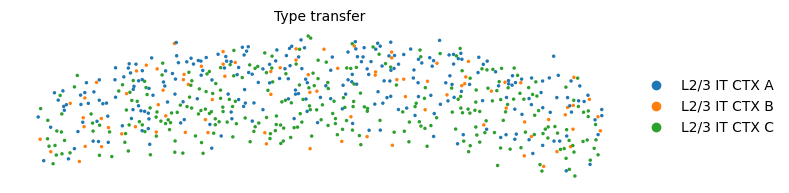

In [10]:
scv.pl.scatter(NR_l23_PC1_2, basis='stereo_rotated',color='Type_transfer',cmap='set2',legend_loc='right margin',figsize=(8,2),size=25)

In [7]:
l23_shifted =sc.read_h5ad('l23_shifted_1_4.h5ad')

In [6]:
l23_shifted

AnnData object with n_obs × n_vars = 2877 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition'
    obsm: 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

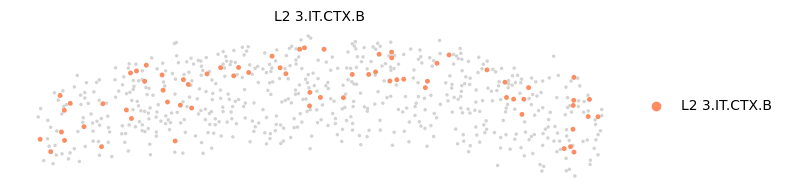

In [49]:
import scvelo as scv
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first color from the Set2 palette
set2_colors = sns.color_palette("Set2")
first_color = set2_colors[0]
NR_l23_PC1_2 = l23_PC1_shifted[l23_PC1_shifted.obs['slice']=='NR1_2']
# Plot using scvelo's scatter (which is similar to embedding)
scv.pl.scatter(NR_l23_PC1_2, 
               basis='stereo_rotated', 
               color='RCTD', 
               groups=['L2_3.IT.CTX.A'], 
               palette=[first_color],  # Use the first color from Set2
               edgecolor=None,figsize=(8,2),size=25,legend_loc='right margin')         # Remove the borders


In [72]:
import scvelo as scv
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Set2 调色板
set2_colors = sns.color_palette("Set2")
# 为已知类型指定颜色
palette = {'L2_3.IT.CTX.A': set2_colors[0], 
           'L2_3.IT.CTX.B': set2_colors[1], 
           'L2_3.IT.CTX.C': set2_colors[2]}  # 为不同类型设置颜色

# 确保 RCTD 列是类别型
l23_PC1_shifted.obs['RCTD'] = l23_PC1_shifted.obs['RCTD'].astype('category')

# 获取所有在 RCTD 列中出现的类型
all_rctd_types = l23_PC1_shifted.obs['RCTD'].cat.categories

# 为未指定的类型分配默认颜色
default_color = 'gray'  # 默认颜色为灰色
for rctd_type in all_rctd_types:
    if rctd_type not in palette:
        palette[rctd_type] = default_color  # 给所有未在 palette 中的类型分配灰色

# 定义切片和类型
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
types = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']

# 设置绘图区域：3行4列
fig, axs = plt.subplots(3, 4, figsize=(12, 8), constrained_layout=True)  # 使用axs

# 迭代每个切片和类型来生成子图
for i, slice_type in enumerate(slices):
    for j, t in enumerate(types):
        ax = axs[j, i]  # 获取对应的子图

        # 根据切片筛选数据
        slice_data = l23_PC1_shifted[l23_PC1_shifted.obs['slice'] == slice_type]

        # 绘制散点图，确保不显示图例
        scv.pl.scatter(slice_data, 
                       basis='stereo_rotated', 
                       color='RCTD', 
                       groups=[t], 
                       palette=palette,  # 使用完整的 palette
                       ax=ax, 
                       edgecolor=None, 
                       title=f'{slice_type} - {t}', 
                       size=25,
                       legend_loc='lower center',  # 图例位置设置为图形上方居中
                       show=False)  # 避免多次调用plt.show()

# 设置布局并显示图形
plt.tight_layout()
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_celltypes.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_celltypes.pdf


In [13]:
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt


highlight = ['L2_3.IT.CTX.A','L2_3.IT.CTX.B','L2_3.IT.CTX.C']
set2 = sns.color_palette("Set2", n_colors=len(highlight))
all_types = l23_PC1_shifted.obs['RCTD'].cat.categories.tolist()
palette = {t: 'lightgray' for t in all_types}
for t, c in zip(highlight, set2):
    palette[t] = c
types = highlight
slices = ['NR1_2','NR2_2','DR1_2','DR2_2']

fig, axs = plt.subplots(
    nrows=len(types),
    ncols=len(slices),
    figsize=(12, 8),
    constrained_layout=True)

for i, typ in enumerate(types):
    for j, sl in enumerate(slices):
        ax = axs[i, j]
        slice_data = l23_PC1_shifted[l23_PC1_shifted.obs['slice']==sl]
        scv.pl.scatter(
            slice_data,
            basis='stereo_rotated',
            color='RCTD',
            groups=[typ],
            palette=palette,
            size=25,
            ax=ax,
            legend_loc='lower center',
            show=False
        )
        ax.set_title(f"{typ} — {sl}", fontsize=10)
        ax.axis('off')


#plt.show()
plt.savefig("V1_l23_celltypes_grid.pdf", dpi=300, bbox_inches='tight')
plt.close()


In [ ]:
import scvelo as scv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

adata = V1
# Suppose your AnnData is in `adata` and the original cell‐type column is 'RCTD'

# 1) Make a new obs column with exactly one category "Oligo" for those two subtypes
adata.obs['RCTD_oligo'] = adata.obs['RCTD'].replace({
    'Oligo.0': 'Oligo',
    'Oligo.1': 'Oligo'
})
# Everything else becomes NaN
adata.obs.loc[~adata.obs['RCTD'].isin(['Oligo.0','Oligo.1']), 'RCTD_oligo'] = np.nan
adata.obs['RCTD_oligo'] = adata.obs['RCTD_oligo'].astype('category')

# 2) Pick a single color for "Oligo"
oligo_color = sns.color_palette("Set2", n_colors=1)[0]

# 3) Plot a 1×4 grid: rows = 1 (just Oligo), cols = your 4 slices
slices = ['NR1_2','NR2_2','DR1_2','DR2_2']
fig, axs = plt.subplots(1, len(slices), figsize=(16,2), constrained_layout=True)

for ax, sl in zip(axs, slices):
    sub = adata[adata.obs['slice'] == sl]
    # scatter only the cells labeled "Oligo"
    scv.pl.scatter(
        sub,
        basis='X_rotated',       # or whatever spatial basis you have
        color='RCTD_oligo',
        groups=['Oligo'],             # exactly that one category
        palette={'Oligo': oligo_color},
        size=25,
        ax=ax,
        legend_loc=None,
        show=False
    )
    ax.set_title(sl, fontsize=12)
    ax.axis('off')

#plt.show()
plt.savefig("V1_celltypes_grid.pdf", dpi=300, bbox_inches='tight')
plt.close()

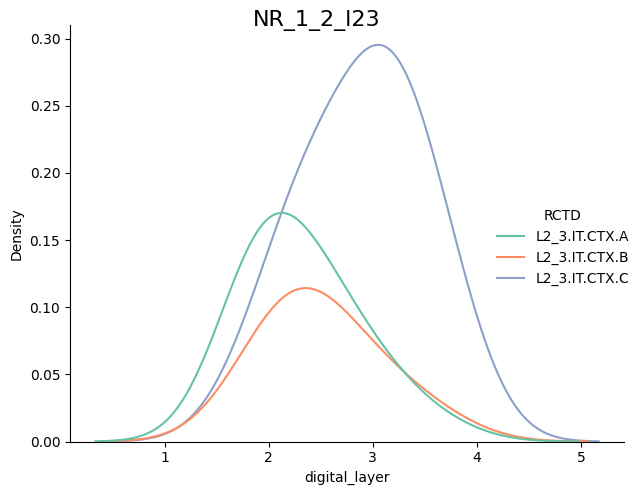

In [69]:
import seaborn as sns

# 过滤只保留 'L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C' 的 RCTD 数据
filtered_data = NR_l23_PC1_2.obs[NR_l23_PC1_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('NR_1_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('NR_1_2_l23.pdf', format='pdf')

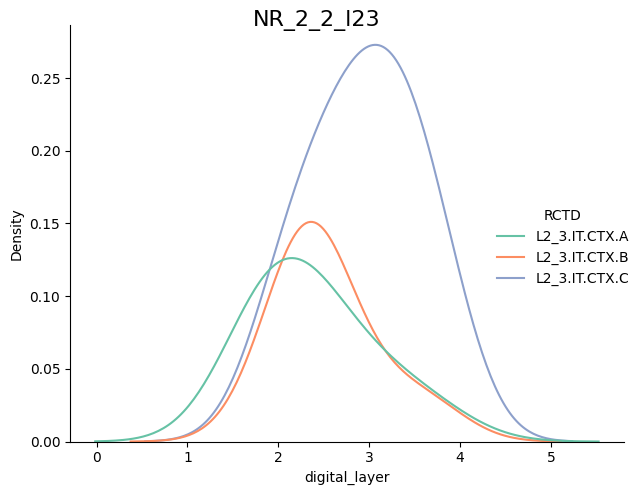

In [70]:
import seaborn as sns

# 过滤只保留 'L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C' 的 RCTD 数据
filtered_data = NR_l23_PC2_2.obs[NR_l23_PC2_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('NR_2_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('NR_2_2_l23.pdf', format='pdf')

In [8]:
NR_l23_PC1 = l23_PC1_shifted[l23_PC1_shifted.obs['condition']=='NR']
DR_l23_PC1 = l23_PC1_shifted[l23_PC1_shifted.obs['condition']=='DR']

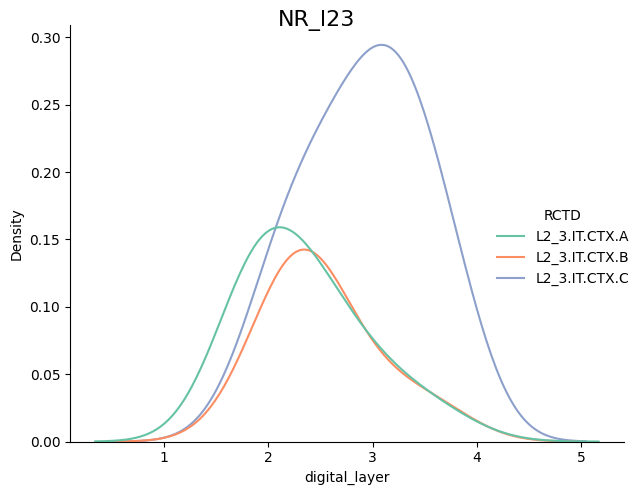

In [64]:
import seaborn as sns

# 过滤只保留 'L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C' 的 RCTD 数据
filtered_data = NR_l23_PC1.obs[NR_l23_PC1.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                #bw_adjust=2)

# 添加标题
g.fig.suptitle('NR_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('V1_NR_l23_kde.pdf', format='pdf')

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = NR_l23_PC1.obs[NR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('NR Digital Layer Density by RCTD')

plt.tight_layout()
fig.savefig("F:/spatial/V1_integration/NR_V/figures/V1_NR_l23_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = DR_l23_PC1.obs[DR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('DR Digital Layer Density by RCTD')

plt.tight_layout()
fig.savefig("F:/spatial/V1_integration/NR_V/figures/V1_DR_l23_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


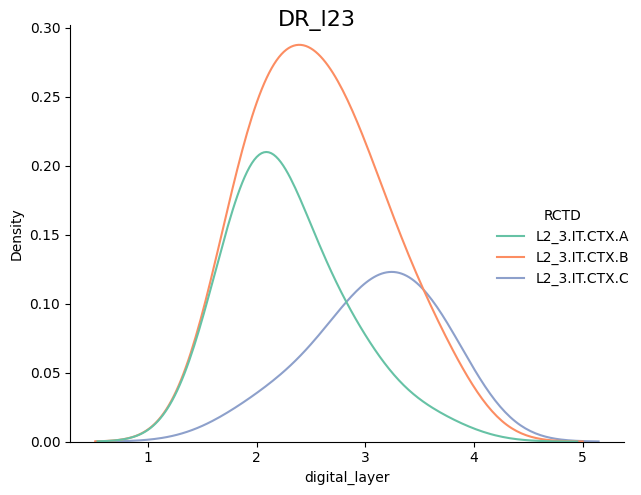

In [23]:
import seaborn as sns

# 过滤只保留 'L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C' 的 RCTD 数据
filtered_data = DR_l23_PC1.obs[DR_l23_PC1.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('DR_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('V1_DR_l23_kde.pdf', format='pdf')

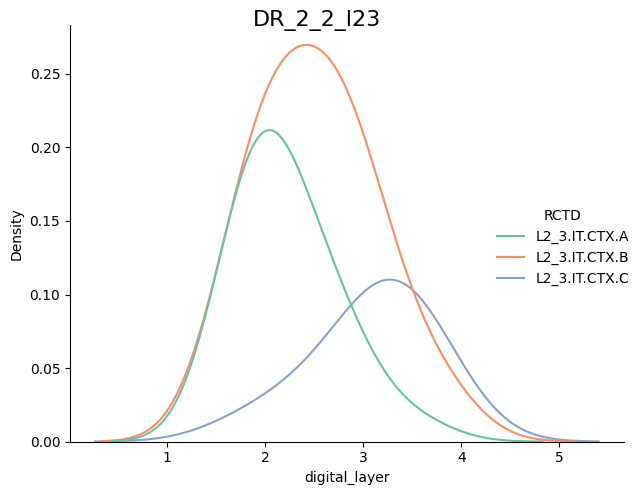

In [71]:
filtered_data = DR_l23_PC2_2.obs[DR_l23_PC2_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('DR_2_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('DR_2_2_l23.pdf', format='pdf')

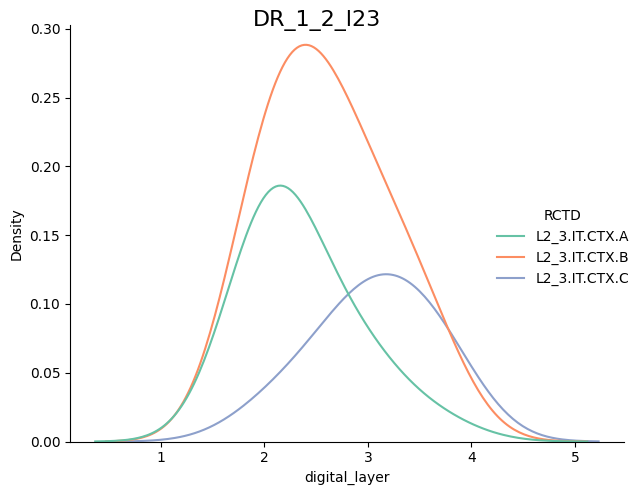

In [72]:
filtered_data = DR_l23_PC1_2.obs[DR_l23_PC1_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('DR_1_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('DR_1_2_l23.pdf', format='pdf')

In [42]:
V1_marker = pd.read_csv('F:/spatial/V1_integration/V1_all_marker_class_exp.xls', sep='\t',index_col='Gene')

In [43]:
V1_marker

Class Type  NR L2/3 IT CTX A  NR L2/3 IT CTX B  \
Gene                                                                  
6530403H02Rik       Common    A          0.484781          0.191665   
AC171003.1          Common    A          0.103736          0.034244   
Abca12              Common    A          0.120339          0.043370   
Adamts16            Common    A          0.167030          0.126619   
Adamts2             Common    A          0.248017          0.016074   
...                    ...  ...               ...               ...   
Spa17          NR_specific    C          0.098927          0.144622   
Susd2          NR_specific    C          0.000548          0.000000   
Tanc1          NR_specific    C          0.041882          0.114464   
Tnfaip6        NR_specific    C          0.017536          0.029757   
Zfp945         NR_specific    C          0.106674          0.109337   

               NR L2/3 IT CTX C  DR L2/3 IT CTX A  DR L2/3 IT CTX B  \
Gene                                                                  
6530403H02Rik          0.059863          0.358221          0.140953   
AC171003.1             0.060094          0.069006          0.037026   
Abca12                 0.028497          0.190335          0.084804   
Adamts16               0.049898          0.219850          0.108423   
Adamts2                0.025256          0.171745          0.040693   
...                         ...               ...               ...   
Spa17                  0.231849          0.053667          0.058059   
Susd2                  0.010427          0.001587          0.002359   
Tanc1                  0.159056          0.069084          0.145258   
Tnfaip6                0.050094          0.006942          0.023290   
Zfp945                 0.207484          0.100021          0.084426   

               DR L2/3 IT CTX C  
Gene                             
6530403H02Rik          0.035144  
AC171003.1             0.023992  
Abca12                 0.057712  
Adamts16               0.033200  
Adamts2                0.042358  
...                         ...  
Spa17                  0.071506  
Susd2                  0.010160  
Tanc1                  0.071536  
Tnfaip6                0.002936  
Zfp945                 0.104247  

[769 rows x 8 columns]

In [44]:
# 创建一个空字典来存储基因集
gene_sets = {}

# 选择Class和Type列
V1_marker_subset = V1_marker[['Class', 'Type']]

# 定义一个函数来获取Class列交集的基因
def get_gene_set(class_values, type_value):
    """
    从DataFrame中获取Class列值在class_values列表中，并且Type列为type_value的基因。
    """
    return V1_marker_subset[(V1_marker_subset['Class'].isin(class_values)) & (V1_marker_subset['Type'] == type_value)].index.tolist()

# 创建6个基因集
# 对于 NR_A, NR_B, NR_C：Class列是 Common + NR_specific，Type列是 A, B, C
for type_value in ['A', 'B', 'C']:
    gene_sets[f"NR_{type_value}"] = get_gene_set(class_values=['Common', 'NR_specific'], type_value=type_value)

# 对于 DR_A, DR_B, DR_C：Class列是 Common + DR_specific，Type列是 A, B, C
for type_value in ['A', 'B', 'C']:
    gene_sets[f"DR_{type_value}"] = get_gene_set(class_values=['Common', 'DR_specific'], type_value=type_value)

# 查看生成的基因集
for gene_set, genes in gene_sets.items():
    print(f"Gene set {gene_set} contains {len(genes)} genes: {genes[:5]}...")  # 显示前5个基因名称



Gene set NR_A contains 164 genes: ['6530403H02Rik', 'AC171003.1', 'Abca12', 'Adamts16', 'Adamts2']...
Gene set NR_B contains 56 genes: ['2810404M03Rik', '9630002D21Rik', 'A830012C17Rik', 'Agmat', 'Blnk']...
Gene set NR_C contains 74 genes: ['4930488N15Rik', '9530036O11Rik', 'Astn2', 'Cadps2', 'Chrm2']...
Gene set DR_A contains 256 genes: ['6530403H02Rik', 'AC171003.1', 'Abca12', 'Adamts16', 'Adamts2']...
Gene set DR_B contains 209 genes: ['2810404M03Rik', '9630002D21Rik', 'A830012C17Rik', 'Agmat', 'Blnk']...
Gene set DR_C contains 135 genes: ['4930488N15Rik', '9530036O11Rik', 'Astn2', 'Cadps2', 'Chrm2']...


In [195]:
gene_sets['NR_A']

['6530403H02Rik',
 'AC171003.1',
 'Abca12',
 'Adamts16',
 'Adamts2',
 'Adcy10',
 'Btbd11',
 'Cav1',
 'Ccdc3',
 'Cdh13',
 'Chst9',
 'Cntnap5c',
 'Col23a1',
 'Cpne7',
 'Deptor',
 'Dpyd',
 'Dscaml1',
 'Eda',
 'Fam149a',
 'Fam169b',
 'Fndc1',
 'Foxo1',
 'Fst',
 'Glis3',
 'Glra3',
 'Gm12198',
 'Gm13986',
 'Gm1604a',
 'Gm19410',
 'Gm20713',
 'Gm29114',
 'Gm45721',
 'Gm47144',
 'Gm50138',
 'Gpc4',
 'Gpc5',
 'Hgf',
 'Hrk',
 'Igsf11',
 'Ikzf2',
 'Kcnn3',
 'Krt77',
 'Lypd1',
 'Man1a',
 'Mei4',
 'Met',
 'Nckap5',
 'Ndrg1',
 'Nek10',
 'Ngf',
 'Nos1',
 'Ntf3',
 'Ntsr1',
 'Pcdh19',
 'Pde3a',
 'Pik3r5',
 'Ptpro',
 'Ptpru',
 'Raver2',
 'Rfx3',
 'Rhbdl3',
 'Robo1',
 'Samd3',
 'Scml4',
 'Sh3bp4',
 'Soga1',
 'St3gal1',
 'Syt10',
 'Tcfl5',
 'Tmem150cos',
 'Trpm1',
 'Vegfc',
 'Vrk2',
 'Vwc2l',
 '1700087I21Rik',
 '4930467D21Rik',
 '4930477G07Rik',
 '4933412O06Rik',
 '9130015G15Rik',
 'AC163638.2',
 'AC163685.1',
 'Ankfn1',
 'Ano2',
 'Arhgef28',
 'Arsj',
 'Atp6v1c2',
 'Ccnjl',
 'Cemip',
 'Chil5',
 'Col14a1',

In [95]:
# 创建一个ExcelWriter对象，指定保存的文件名
with pd.ExcelWriter("gene_sets.xlsx") as writer:
    # 对每个基因集，分别保存为一个工作表
    for key, gene_set in gene_sets.items():
        # 将每个基因集转换为DataFrame并写入对应的工作表
        df = pd.DataFrame(gene_set, columns=["Gene"])
        df.to_excel(writer, sheet_name=key, index=False)

print("Gene sets have been saved to 'gene_sets.xlsx'.")

Gene sets have been saved to 'gene_sets.xlsx'.


In [58]:
import matplotlib.pyplot as plt
import scvelo as scv
import numpy as np

# 假设 gene_sets 已经定义，并且有 6 个基因集
# NR_A, NR_B, NR_C, DR_A, DR_B, DR_C
# 获取数据：l23_shifted

# 设置切片
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
slice_gene_sets = {
    'NR1_2': ['NR_A', 'NR_B', 'NR_C'],
    'NR2_2': ['NR_A', 'NR_B', 'NR_C'],
    'DR1_2': ['DR_A', 'DR_B', 'DR_C'],
    'DR2_2': ['DR_A', 'DR_B', 'DR_C']
}

# 创建一个4列3行的子图布局
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # 将二维数组展平，方便索引

# 计数器，用来确定在哪个子图位置绘制
subplot_idx = 0

# 创建一个列表用于保存所有表达量，用于colorbar
all_expression_values = []

# 为了存储所有归一化后的表达量，我们需要一个字典
normalized_expression_dict = {}

# 收集所有需要绘制的基因表达数据
for col_idx, slice_type in enumerate(slices):
    # 获取对应的基因集
    gene_sets_for_slice = slice_gene_sets[slice_type]
    
    # 获取该切片的数据
    slice_data = l23_shifted[l23_shifted.obs['slice'] == slice_type]
    
    # 为每个基因集绘制散点图
    for row_idx, gene_set_name in enumerate(gene_sets_for_slice):
        # 获取基因集的基因列表
        gene_set = gene_sets[gene_set_name]
        
        # 获取 gene_set 和 slice_data 中的基因的交集
        common_genes = list(set(gene_set) & set(slice_data.var_names))
        
        if len(common_genes) == 0:
            print(f"Warning: No valid genes from {gene_set_name} in {slice_type}")
            continue
        
        # 筛选出交集中的基因
        slice_data_filtered = slice_data[:, common_genes]
        
        # 计算基因集在该切片中的表达值（例如，取平均值或者总和）
        total_expression = slice_data_filtered.X.mean(axis=1).A1  # 每个细胞的平均表达值
        
        # 获取表达值的1%和99%分位数
        vmin = np.percentile(total_expression, 5)
        vmax = np.percentile(total_expression, 95)
        
        # 将小于1%的值设为1%的值，大于99%的值设为99%的值
        total_expression_clipped = np.clip(total_expression, vmin, vmax)
    
        # 获取对应的坐标
        stereo_coordinates = slice_data.obsm['stereo_rotated']
        
        # 绘制散点图
        ax = axes[row_idx * 4 + col_idx]  # 计算当前图的位置
        scatter = ax.scatter(stereo_coordinates[:, 0], stereo_coordinates[:, 1], c=total_expression_clipped, cmap='coolwarm', s=10)
        
        ax.set_title(f'{slice_type} - {gene_set_name}')
        ax.axis('off')  # 隐藏坐标轴
        
        # 保存表达量数据，用于colorbar
        all_expression_values.extend(total_expression_clipped)

# 添加colorbar
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])  # 重新调整colorbar的位置，使其不重叠
norm = plt.Normalize(vmin=np.percentile(all_expression_values, 5), vmax=np.percentile(all_expression_values, 95))  # 设置colorbar的范围为5%-95%
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm', norm=norm), cax=cbar_ax, orientation='horizontal')

# 设置colorbar的刻度，只显示起始和终止标签
cbar.set_ticks([norm.vmin, norm.vmax])  # 设置colorbar的刻度
cbar.set_ticklabels([f'5%', f'95%'])  # 设置刻度标签为5%和95%

# 手动调整布局，使得图像不与colorbar重叠
plt.subplots_adjust(bottom=0.02)

# 显示结果
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_ABC.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_ABC.pdf


In [50]:
File_path ='F:/spatial/V1_integration/V1_L23_TF_RCG_corr_type.xlsx'
df_disactivation = pd.read_excel(File_path, sheet_name="Disactivation")
df_independent = pd.read_excel(File_path, sheet_name="Independent")
df_activation = pd.read_excel(File_path, sheet_name="Activation")
df_inhibition = pd.read_excel(File_path, sheet_name="Inhibition")
gene_sets = {
    'Disactivation': df_disactivation['Disactivation'].tolist(),
    'Independent': df_independent['Independent'].tolist(),
    'Activation': df_activation['Activation'].tolist(),
    'Inhibition': df_inhibition['Inhibition'].tolist()
}

# 输出gene_sets字典查看
for gene_set, genes in gene_sets.items():
    print(f"Gene set {gene_set} contains {len(genes)} genes: {genes[:5]}...")  # 显示前5个基因名称

Gene set Disactivation contains 130 genes: ['1700016P03Rik', '1700024B18Rik', '1700110K17Rik', '1700112D23Rik', '4930484I04Rik']...
Gene set Independent contains 161 genes: ['1700030F04Rik', '1700084C06Rik', '1700111E14Rik', '2810432F15Rik', '4930414F18Rik']...
Gene set Activation contains 70 genes: ['4930590L20Rik', '9130015G15Rik', 'AC163685.1', 'Adam33', 'Adcy10']...
Gene set Inhibition contains 8 genes: ['Astn2', 'Cdh13', 'Epha6', 'Kcnh5', 'Nkain2']...


In [59]:
File_path = 'F:/spatial/V1_integration/V1_L23_TF_RCG_corr_type.xlsx'

df_disactivation = pd.read_excel(File_path, sheet_name="Disactivation")
df_independent = pd.read_excel(File_path, sheet_name="Independent")
df_activation = pd.read_excel(File_path, sheet_name="Activation")
df_inhibition = pd.read_excel(File_path, sheet_name="Inhibition")

gene_sets = {
    'Inhibition': df_inhibition['Inhibition'].tolist(),
    'Disactivation': df_disactivation['Disactivation'].tolist(),
    'Activation': df_activation['Activation'].tolist(),
    'Independent': df_independent['Independent'].tolist()
    

}

# 假设 geneset 数据已经定义
# 获取交集函数
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(V1_L23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

# 假设 RP_gene_order_list, RN_gene_order_list 等已经定义
genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

# 根据 gene_sets 和 genesets 创建新的 geneset 交集
new_genesets = {}
for gene_set_name, gene_set in gene_sets.items():
    for sub_set_name, sub_set in genesets.items():
        common_genes = list(set(gene_set) & set(sub_set))
        if common_genes:
            new_geneset_name = f"{gene_set_name}_{sub_set_name}"
            new_genesets[new_geneset_name] = common_genes

print("New Genesets and their Genes:")
for name, genes in new_genesets.items():
    print(f"{name}: {genes[:10]}...")  # 仅显示前10个基因，如果基因集较长



New Genesets and their Genes:
Inhibition_RN_pos: ['Nkain2', 'Ptprk', 'Epha6', 'Zfp804b', 'Cdh13']...
Inhibition_RN_neg: ['Astn2', 'Kcnh5', 'Robo3']...
Disactivation_RN_pos: ['Hspa8', 'Fggy', 'Cbarp', 'Slc25a3', 'Ahi1', 'Tiparp', '4930599N23Rik', 'Bbs9', 'Ccdc85a', 'Nrxn2']...
Disactivation_RN_neg: ['Asic2', 'Vmp1', 'Fndc9', 'Wwox', 'Sik3', 'Chgb', 'Calm2', 'Stmn3', 'Pebp1', 'Syngr3']...
Activation_RP_pos: ['Grik4', 'Fst', 'Gabra3', 'Cacnb2', 'Gsdme', 'Khdrbs2', 'Snca', 'Gm48749', 'Fgf13', 'Adcy10']...
Activation_RP_neg: ['Dkk3', 'Runx2', 'Sorcs1', 'Siae', 'Gm2824', 'Gm36146', '4930590L20Rik', 'Macrod1', 'Dnah1', 'Cdyl2']...
Independent_RP_pos: ['Gm28376', 'Gm48249', 'Gdpd5', 'Megf11', 'Gm37229', 'Tsga10', 'Tubd1', 'Trps1', 'Ttc26', 'Rasgef1b']...
Independent_RP_neg: ['Asap2', 'Prune2', 'Lpp', 'Dock1', 'Efcab6', 'Tpd52l1', 'Susd1', 'Hs3st1', 'Gm47283', 'Hps4']...


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        V1_L23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = new_genesets
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
n_rows, n_cols = len(genesets), len(slice_categories)

# 创建绘图布局
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    if not geneset:
        for ax in axs[row_idx, :]:
            ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 vmin, vmax 和 g_min, g_max
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)  # vmin 和 vmax 为数据的最小值和最大值
            g_clipped = np.clip(g, vmin, vmax)  # 将数据限制在 vmin 和 vmax 范围内
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)  # 归一化到 [0, 1]
            slice_g_values[slice_category] = (g_norm, slice_data.obsm['stereo_rotated'][:, 0], slice_data.obsm['stereo_rotated'][:, 1])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]  # 基准 slice 的 g_min 和 g_max

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x, y = slice_g_values.get(slice_category, (None, None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 缩放公式
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x, y)

    # Step 4: 绘制每个 slice 的图
    for col_idx, slice_category in enumerate(slice_categories):
        ax = axs[row_idx, col_idx]
        adjusted_g, x, y = adjusted_g_values.get(slice_category, (None, None, None))

        if adjusted_g is None:
            ax.axis("off")
            continue

        # 绘制散点图，使用基准 slice 的颜色范围 [0, 1]
        scatter = ax.scatter(
            x, y,
            c=adjusted_g, cmap='seismic', s=10, alpha=1.0, vmin=0, vmax=1
        )

        # 设置标题
#        ax.set_title(f"{slice_category} - {geneset_name}", fontsize=10)
        ax.axis("off")

# 添加全局颜色条
#cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [左, 下, 宽度, 高度]
#cbar = fig.colorbar(
#    plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap='seismic'),
#    cax=cbar_ax,
#    orientation='horizontal'
#)
#cbar.set_label('Gene Expression (Adjusted)', fontsize=12)

# 添加总标题并调整位置
#plt.suptitle("Gene Expression with Slice-wise Clipping and Scaling (5%-95%)", fontsize=16, y=0.97)
plt.subplots_adjust(top=0.9, bottom=0.1)  # 调整布局，避免重叠
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_TF_adjusted_g.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_TF_adjusted_g.pdf


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
# 数据准备
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        V1_L23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = new_genesets

slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建 1列8行的图形布局
fig, axs = plt.subplots(8, 1, figsize=(4, 4 * len(genesets)), constrained_layout=True)

# 为每个 geneset 绘制一个折线图
for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    ax = axs[row_idx]  # 获取子图

    if not geneset:
        ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 g 值并缩放
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)
            g_clipped = np.clip(g, vmin, vmax)
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)
            slice_g_values[slice_category] = (g_norm, slice_data.obs['digital_layer'])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x = slice_g_values.get(slice_category, (None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 使用基准 slice 的缩放公式调整 g 值
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x)

    # Step 4: 合并 NR 和 DR 数据
    nr_g_values = []
    nr_x_values = []
    dr_g_values = []
    dr_x_values = []

    for slice_category in ['NR1_2', 'NR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            nr_g_values.append(g)
            nr_x_values.append(x)

    for slice_category in ['DR1_2', 'DR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            dr_g_values.append(g)
            dr_x_values.append(x)

    if nr_g_values:
        nr_g_values = np.concatenate(nr_g_values)
        nr_x_values = np.concatenate(nr_x_values)

    if dr_g_values:
        dr_g_values = np.concatenate(dr_g_values)
        dr_x_values = np.concatenate(dr_x_values)
        
#   smooth_frac = 0.66  # 越大曲线越平滑
    
    NR_color = '#E7241D'
    DR_color = '#2372A9'

    # Step 5: 绘制综合后的折线图
    for g_values, x_values, color, label in zip(
        [nr_g_values, dr_g_values],
        [nr_x_values, dr_x_values],
        [NR_color, DR_color],
        ['NR', 'DR']
    ):
        if g_values.size > 0:
            bins = np.arange(min(x_values), max(x_values), 0.25)
            bin_centers = 0.5 * (bins[1:] + bins[:-1])

            # 计算每个 bin 的均值和标准差
            binned_means = [np.mean(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                            for i in range(len(bins) - 1)]
            binned_std = [np.std(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                          for i in range(len(bins) - 1)]

#            # LOWESS 会返回和 bin_centers 对应长度的平滑值
#            means_smooth = lowess(
#                       binned_means, 
#                       bin_centers, 
#                       frac=smooth_frac, 
#                       return_sorted=False
#             )
#            std_smooth = lowess(
#                       binned_std, 
#                       bin_centers, 
#                       frac=smooth_frac, 
#                       return_sorted=False
#             )

            # 绘制折线图
            ax.plot(bin_centers, binned_means, color=color, label=f'{label}')

            # 添加标准偏差阴影
            ax.fill_between(bin_centers,
                            np.array(binned_means) - np.array(binned_std) * 0.05,
                            np.array(binned_means) + np.array(binned_std) * 0.05,
                            color=color, alpha=0.1)

    # 设置图标题和标签
    ax.set_title(f"{geneset_name}", fontsize=14)
    #ax.set_ylim(0.2, 0.8)
    ax.set_xlabel('Digital Layer', fontsize=12)
    ax.set_ylabel('Normalized Gene Expression', fontsize=12)

    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 添加总标题
plt.suptitle("Line Plots of Gene Expression across Conditions", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_TF_adjusted_g_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_TF_adjusted_g_lineplot.pdf


In [91]:
import pandas as pd

# 假设 File_path, V1_L23_PC1_df 和 adata 等已经定义

# 从文件中读取数据
File_path = 'F:/spatial/V1_integration/V1_L23_TF_RCG_corr_type.xlsx'

df_disactivation = pd.read_excel(File_path, sheet_name="Disactivation")
df_independent = pd.read_excel(File_path, sheet_name="Independent")
df_activation = pd.read_excel(File_path, sheet_name="Activation")
df_inhibition = pd.read_excel(File_path, sheet_name="Inhibition")

# 创建基因集
gene_sets = {
    'Disactivation': df_disactivation['Disactivation'].tolist(),
    'Independent': df_independent['Independent'].tolist(),
    'Activation': df_activation['Activation'].tolist(),
    'Inhibition': df_inhibition['Inhibition'].tolist()
}

# 获取交集函数
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(V1_L23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

# 假设 RP_gene_order_list, RN_gene_order_list 等已经定义
genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

# 根据 gene_sets 和 genesets 创建新的 geneset 交集
new_genesets = {}
for gene_set_name, gene_set in gene_sets.items():
    for sub_set_name, sub_set in genesets.items():
        common_genes = list(set(gene_set) & set(sub_set))
        new_geneset_name = f"{gene_set_name}_{sub_set_name}"
        new_genesets[new_geneset_name] = common_genes

# 输出每个新基因集的基因，包括0基因的基因集
print("New Genesets and their Genes:")
for name, genes in new_genesets.items():
    print(f"{name}: {len(genes)} genes - {genes[:10]}...")  # 显示基因集的长度和前10个基因


New Genesets and their Genes:
Disactivation_RP_pos: 0 genes - []...
Disactivation_RP_neg: 0 genes - []...
Disactivation_RN_pos: 69 genes - ['4930599N23Rik', 'Ptgds', 'Bbs9', 'Kras', 'Pcsk1n', 'Slc25a3', 'Ikzf2', 'Cst3', 'Nrxn2', 'Baiap2']...
Disactivation_RN_neg: 52 genes - ['Gm46124', 'Gm37240', 'Arid3b', '9630028H03Rik', 'Catspere2', 'Ndfip1', 'Nefm', 'Frmd6', 'Chgb', 'Vmp1']...
Disactivation_NRP_pos: 0 genes - []...
Disactivation_NRP_neg: 0 genes - []...
Disactivation_NRN_pos: 0 genes - []...
Disactivation_NRN_neg: 0 genes - []...
Independent_RP_pos: 66 genes - ['Lrch1', 'Col14a1', 'Gm11099', 'Pbx3', 'Gm13269', 'Sgk3', 'Plcl1', 'Nrp1', 'Tsga10', 'Rab27a']...
Independent_RP_neg: 82 genes - ['Gm13919', 'Gm47283', 'Gadl1', 'Prmt8', 'Gm16189', 'Pip5k1b', 'Elmo1', 'Gm20089', '2810432F15Rik', 'Dglucy']...
Independent_RN_pos: 0 genes - []...
Independent_RN_neg: 0 genes - []...
Independent_NRP_pos: 0 genes - []...
Independent_NRP_neg: 0 genes - []...
Independent_NRN_pos: 0 genes - []...
Ind

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 获取 NR 和 DR 数据
NR_data = l23_shifted[l23_shifted.obs['condition'] == 'NR']
DR_data = l23_shifted[l23_shifted.obs['condition'] == 'DR']

# 假设 NR_gene_sets 和 DR_gene_sets 是这样的字典形式
NR_gene_sets = {
    'NR_A': gene_sets['NR_A'],
    'NR_B': gene_sets['NR_B'],
    'NR_C': gene_sets['NR_C']
}

DR_gene_sets = {
    'DR_A': gene_sets['DR_A'],
    'DR_B': gene_sets['DR_B'],
    'DR_C': gene_sets['DR_C']
}



In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 假设 NR_data 和 DR_data 已经准备好，并且 NR 和 DR 数据集包含了 'NR_A', 'NR_B', 'NR_C', 'DR_A', 'DR_B', 'DR_C'

# 设定新的 bin 范围为 1 到 4，步长为 0.25
bin_edges = np.arange(1, 4.25, 0.1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # 计算每个区间的中心

# 计算 NR 和 DR 的表达量统计（使用新的 bin）
def compute_bin_statistics_with_range(data, gene_set, bin_edges):
    binned_means = []
    binned_sems = []
    
    # 遍历每个 bin 来计算均值和标准误差
    for i in range(len(bin_edges)-1):
        bin_data = data[data.obs['digital_layer'] >= bin_edges[i]]  # 包含下限
        bin_data = bin_data[bin_data.obs['digital_layer'] < bin_edges[i+1]]  # 不包含上限
        if bin_data.n_obs > 0:  # 如果 bin 中有数据
            # 获取对应的基因集表达量
            common_genes = list(set(gene_set) & set(bin_data.var_names))  # 获取交集基因
            if len(common_genes) > 0:
                bin_data_filtered = bin_data[:, common_genes]  # 筛选出基因集相关基因
                mean_expression = bin_data_filtered.X.mean(axis=1).A1
                binned_means.append(mean_expression.mean())  # 计算该 bin 的均值
                sem_expression = mean_expression.std() / np.sqrt(len(mean_expression))  # 计算标准误差
                binned_sems.append(sem_expression)
            else:
                binned_means.append(np.nan)
                binned_sems.append(np.nan)
        else:
            binned_means.append(np.nan)
            binned_sems.append(np.nan)
    
    return np.array(binned_means), np.array(binned_sems)

# NR 和 DR 中每个基因集的表达量统计
NR_gene_sets = ['NR_A', 'NR_B', 'NR_C']
DR_gene_sets = ['DR_A', 'DR_B', 'DR_C']

# 存储 NR 和 DR 数据的统计结果
NR_means_dict, NR_sems_dict = {}, {}
DR_means_dict, DR_sems_dict = {}, {}

# 计算 NR 中每个基因集的折线数据
for gene_set in NR_gene_sets:
    NR_means_dict[gene_set], NR_sems_dict[gene_set] = compute_bin_statistics_with_range(NR_data, gene_sets[gene_set], bin_edges)

# 计算 DR 中每个基因集的折线数据
for gene_set in DR_gene_sets:
    DR_means_dict[gene_set], DR_sems_dict[gene_set] = compute_bin_statistics_with_range(DR_data, gene_sets[gene_set], bin_edges)

# 标准化到 [0, 0.5] 范围
def normalize_to_0_0_5(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data.reshape(-1, 1)).flatten()

# 对 NR 和 DR 中的均值和标准误差进行标准化
for gene_set in NR_gene_sets:
    NR_means_dict[gene_set] = normalize_to_0_0_5(NR_means_dict[gene_set])
    NR_sems_dict[gene_set] = normalize_to_0_0_5(NR_sems_dict[gene_set])

for gene_set in DR_gene_sets:
    DR_means_dict[gene_set] = normalize_to_0_0_5(DR_means_dict[gene_set])
    DR_sems_dict[gene_set] = normalize_to_0_0_5(DR_sems_dict[gene_set])

# 缩小标准误差阴影的宽度
def scale_sems(sems_dict, scale_factor=0.5):
    for gene_set in sems_dict:
        sems_dict[gene_set] *= scale_factor
    return sems_dict

# 缩小标准误差阴影的宽度
NR_sems_dict = scale_sems(NR_sems_dict, scale_factor=0.1)
DR_sems_dict = scale_sems(DR_sems_dict, scale_factor=0.1)

# 绘制折线图
plt.figure(figsize=(4, 8))

# NR数据的折线图（将 NR_A, NR_B, NR_C 显示在同一图中）
plt.subplot(2, 1, 1)
colors = plt.cm.Set2(np.linspace(0, 1, len(NR_gene_sets)))  # 获取 set2 调色板的颜色
for idx, gene_set in enumerate(NR_gene_sets):
    plt.plot(bin_centers, NR_means_dict[gene_set], label=f'{gene_set} Expression', color=colors[idx])
    # 添加标准误差阴影（标准误差也进行了等比缩放）
    plt.fill_between(bin_centers, 
                     NR_means_dict[gene_set] - NR_sems_dict[gene_set], 
                     NR_means_dict[gene_set] + NR_sems_dict[gene_set], 
                     color=colors[idx], alpha=0.3)

plt.title('NR Expression - Mean and SEM (Normalized to 0-0.5)')
plt.xlabel('Digital Layer')
plt.ylabel('Normalized Mean Expression')
plt.legend()

# DR数据的折线图（将 DR_A, DR_B, DR_C 显示在同一图中）
plt.subplot(2, 1, 2)
colors = plt.cm.Set2(np.linspace(0, 1, len(DR_gene_sets)))  # 获取 set2 调色板的颜色
for idx, gene_set in enumerate(DR_gene_sets):
    plt.plot(bin_centers, DR_means_dict[gene_set], label=f'{gene_set} Expression', color=colors[idx])
    # 添加标准误差阴影（标准误差也进行了等比缩放）
    plt.fill_between(bin_centers, 
                     DR_means_dict[gene_set] - DR_sems_dict[gene_set], 
                     DR_means_dict[gene_set] + DR_sems_dict[gene_set], 
                     color=colors[idx], alpha=0.3)

plt.title('DR Expression - Mean and SEM (Normalized to 0-0.5)')
plt.xlabel('Digital Layer')
plt.ylabel('Normalized Mean Expression')
plt.legend()

plt.tight_layout()
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_Mean_0.1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_Mean_0.1.pdf


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler

# 定义三次多项式拟合函数
def poly3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# 假设 NR_data 和 DR_data 已经准备好，并且 NR 和 DR 数据集包含了 'NR_A', 'NR_B', 'NR_C', 'DR_A', 'DR_B', 'DR_C'
# 假设计算出的 NR_means_dict 和 DR_means_dict 已经准备好

# 绘制拟合曲线
plt.figure(figsize=(4, 8))

# NR数据的拟合曲线（将 NR_A, NR_B, NR_C 显示在同一图中）
plt.subplot(2, 1, 1)
colors = plt.cm.Set2(np.linspace(0, 1, len(NR_gene_sets)))  # 获取 set2 调色板的颜色

for idx, gene_set in enumerate(NR_gene_sets):
    # 获取有效数据，排除NaN值
    valid_bin_centers = bin_centers[~np.isnan(NR_means_dict[gene_set])]
    valid_means = NR_means_dict[gene_set][~np.isnan(NR_means_dict[gene_set])]
    
    # 拟合数据
    popt, pcov = curve_fit(poly3, valid_bin_centers, valid_means, p0=[1, 1, 1, 1])
    
    # 计算拟合曲线
    x_fit = np.linspace(valid_bin_centers.min(), valid_bin_centers.max(), 100)
    y_fit = poly3(x_fit, *popt)
    
    # 计算拟合曲线的标准误差
    perr = np.sqrt(np.diag(pcov))  # 提取拟合参数的标准误差
    y_fit_error = np.sqrt(np.sum((x_fit[:, np.newaxis]**np.array([3, 2, 1, 0])) * perr**2, axis=1))  # 计算拟合值的误差
    
    # 缩窄标准误差阴影为 0.1 倍
    y_fit_error *= 0.001
    
    # 绘制拟合曲线
    plt.plot(x_fit, y_fit, label=f'{gene_set} Fitted Curve', color=colors[idx], linestyle='-', linewidth=2)
    
    # 绘制拟合曲线的标准误差阴影
    plt.fill_between(x_fit, y_fit - y_fit_error, y_fit + y_fit_error, color=colors[idx], alpha=0.3)

plt.title('NR Expression - Fitted Curves and SEM (Normalized to 0-0.5)')
plt.xlabel('Digital Layer')
plt.ylabel('Normalized Mean Expression')
plt.legend()

# DR数据的拟合曲线（将 DR_A, DR_B, DR_C 显示在同一图中）
plt.subplot(2, 1, 2)
for idx, gene_set in enumerate(DR_gene_sets):
    # 获取有效数据，排除NaN值
    valid_bin_centers = bin_centers[~np.isnan(DR_means_dict[gene_set])]
    valid_means = DR_means_dict[gene_set][~np.isnan(DR_means_dict[gene_set])]
    
    # 拟合数据
    popt, pcov = curve_fit(poly3, valid_bin_centers, valid_means, p0=[1, 1, 1, 1])
    
    # 计算拟合曲线
    x_fit = np.linspace(valid_bin_centers.min(), valid_bin_centers.max(), 100)
    y_fit = poly3(x_fit, *popt)
    
    # 计算拟合曲线的标准误差
    perr = np.sqrt(np.diag(pcov))  # 提取拟合参数的标准误差
    y_fit_error = np.sqrt(np.sum((x_fit[:, np.newaxis]**np.array([3, 2, 1, 0])) * perr**2, axis=1))  # 计算拟合值的误差
    
    # 缩窄标准误差阴影为 0.1 倍
    y_fit_error *= 0.001
    
    # 绘制拟合曲线
    plt.plot(x_fit, y_fit, label=f'{gene_set} Fitted Curve', color=colors[idx], linestyle='-', linewidth=2)
    
    # 绘制拟合曲线的标准误差阴影
    plt.fill_between(x_fit, y_fit - y_fit_error, y_fit + y_fit_error, color=colors[idx], alpha=0.3)

plt.title('DR Expression - Fitted Curves and SEM (Normalized to 0-0.5)')
plt.xlabel('Digital Layer')
plt.ylabel('Normalized Mean Expression')
plt.legend()

plt.tight_layout()
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_Mean_0.1曲线.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_Mean_0.1曲线.pdf


In [202]:
NR_gene_sets = {
    'NR_A': gene_sets['NR_A'],
    'NR_B': gene_sets['NR_B'],
    'NR_C': gene_sets['NR_C']
}

DR_gene_sets = {
    'DR_A': gene_sets['DR_A'],
    'DR_B': gene_sets['DR_B'],
    'DR_C': gene_sets['DR_C']
}

In [203]:
NR_gene_sets

{'NR_A': ['6530403H02Rik',
  'AC171003.1',
  'Abca12',
  'Adamts16',
  'Adamts2',
  'Adcy10',
  'Btbd11',
  'Cav1',
  'Ccdc3',
  'Cdh13',
  'Chst9',
  'Cntnap5c',
  'Col23a1',
  'Cpne7',
  'Deptor',
  'Dpyd',
  'Dscaml1',
  'Eda',
  'Fam149a',
  'Fam169b',
  'Fndc1',
  'Foxo1',
  'Fst',
  'Glis3',
  'Glra3',
  'Gm12198',
  'Gm13986',
  'Gm1604a',
  'Gm19410',
  'Gm20713',
  'Gm29114',
  'Gm45721',
  'Gm47144',
  'Gm50138',
  'Gpc4',
  'Gpc5',
  'Hgf',
  'Hrk',
  'Igsf11',
  'Ikzf2',
  'Kcnn3',
  'Krt77',
  'Lypd1',
  'Man1a',
  'Mei4',
  'Met',
  'Nckap5',
  'Ndrg1',
  'Nek10',
  'Ngf',
  'Nos1',
  'Ntf3',
  'Ntsr1',
  'Pcdh19',
  'Pde3a',
  'Pik3r5',
  'Ptpro',
  'Ptpru',
  'Raver2',
  'Rfx3',
  'Rhbdl3',
  'Robo1',
  'Samd3',
  'Scml4',
  'Sh3bp4',
  'Soga1',
  'St3gal1',
  'Syt10',
  'Tcfl5',
  'Tmem150cos',
  'Trpm1',
  'Vegfc',
  'Vrk2',
  'Vwc2l',
  '1700087I21Rik',
  '4930467D21Rik',
  '4930477G07Rik',
  '4933412O06Rik',
  '9130015G15Rik',
  'AC163638.2',
  'AC163685.1',
  'Ankf

In [144]:
l23_shifted

AnnData object with n_obs × n_vars = 2877 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition'
    obsm: 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [100]:
# 查看 'digital_layer' 列的最小值和最大值
min_value = l23_PC1_shifted.obs['digital_layer'].min()
max_value = l23_PC1_shifted.obs['digital_layer'].max()

print(f"最小值: {min_value}")
print(f"最大值: {max_value}")


最小值: 1.500928066
最大值: 3.999599784


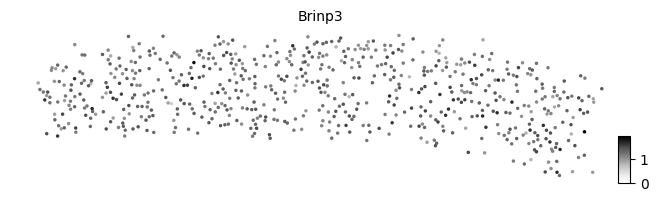

In [21]:
scv.pl.scatter(NR_l23_PC2_2, basis='stereo_rotated',color='Brinp3',cmap='Greys',legend_loc='right margin',figsize=(8,2),size=25)

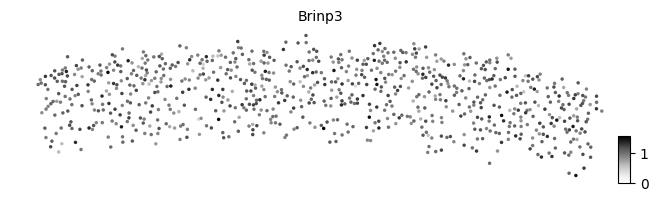

In [22]:
scv.pl.scatter(DR_l23_PC1_2, basis='stereo_rotated',color='Brinp3',cmap='Greys',legend_loc='right margin',figsize=(8,2),size=25)

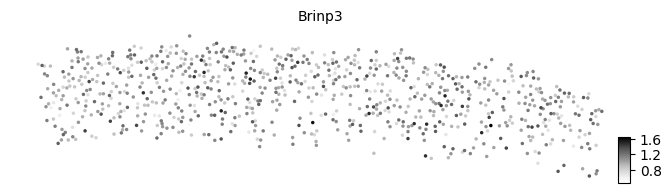

In [23]:
scv.pl.scatter(DR_l23_PC2_2, basis='stereo_rotated',color='Brinp3',cmap='Greys',legend_loc='right margin',figsize=(8,2),size=25)

In [22]:
l23_shifted.obs['slice']

74897    NR1_2
74901    NR1_2
74931    NR1_2
74935    NR1_2
74941    NR1_2
         ...  
35282    DR2_2
35283    DR2_2
35284    DR2_2
35286    DR2_2
35289    DR2_2
Name: slice, Length: 2877, dtype: category
Categories (4, object): ['DR1_2', 'DR2_2', 'NR1_2', 'NR2_2']

In [121]:
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np

# 设置数据
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)# 替换为你自己的数据

# 目标基因列表
genes = ['Hadh', 'Hs3st1', 'Igfn1', 'Pcdh15', 'Sema3a', 'Egfem1', 'Fgf1', 
         'Igsf9b', 'Nell1', 'Cdh13', 'Epha6', 'Ntng1', 'Rorb', 'Trpc6']

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图布局，纵向显示不同gene，横向显示4个slice
fig, axes = plt.subplots(len(genes), len(slice_categories), figsize=(12, 2 * len(genes)))
# 为每个gene绘制子图
for i, gene in enumerate(genes):
    for j, slice_category in enumerate(slice_categories):
        ax = axes[i, j]  # 获取当前子图位置
        
        # 筛选当前 slice 的数据
        subset = adata[adata.obs['slice'] == slice_category, :]
        
        # 获取当前基因的表达数据
        gene_expression = np.asarray(subset[:, gene].X).flatten()

        
        # 绘制当前 gene 的散点图
        scv.pl.scatter(subset, basis='stereo_rotated', color=gene_expression, 
                       cmap='viridis', ax=ax, show=False, 
                       size=25, title=f'{slice_category} - {gene}',
                       colorbar=True)
        
        # 隐藏坐标轴标签，避免重复显示
        ax.set_xlabel('')
        ax.set_ylabel('')

# 设置统一的 colorbar
plt.subplots_adjust(hspace=0.4, wspace=0.5)
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_TF_gene.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata

In [15]:
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        V1_L23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

import pandas as pd

slopes = (
    V1_L23_PC1_df[['Gene','NR_slope','DR_slope']]
    .dropna(subset=['NR_slope','DR_slope'])
    .copy()
)
# 计算差值列
slopes['diff'] = (slopes['NR_slope'] - slopes['DR_slope']).abs()

# 2) 对每个 geneset 单独筛选并取 top10
top10_per_set = {}
for set_name, gene_list in genesets.items():
    sub = slopes[slopes['Gene'].isin(gene_list)]
    top10 = (
        sub
        .sort_values('diff', ascending=False)
        .head(10)
        .reset_index(drop=True)
    )
    top10_per_set[set_name] = top10[['Gene','NR_slope','DR_slope','diff']]

# 3) 打印结果
for set_name, df_top in top10_per_set.items():
    print(f"\n=== {set_name} (top 10) ===")
    print(df_top.to_string(index=False))



=== RP_pos (top 10) ===
    Gene  NR_slope  DR_slope     diff
  Egfem1  0.004625 -0.000591 0.005216
  Pcdh15  0.000644  0.005396 0.004752
Cntnap5a  0.003134 -0.000563 0.003697
 Gm15398  0.001739  0.004841 0.003103
   Fgf13  0.001452 -0.001574 0.003026
  Sorcs2  0.001995 -0.000156 0.002151
  Cacnb2  0.002239  0.000089 0.002151
 Khdrbs2  0.001277 -0.000850 0.002127
Rasgef1b  0.000655 -0.001419 0.002073
 Zdhhc14  0.003109  0.001408 0.001701

=== RP_neg (top 10) ===
         Gene  NR_slope  DR_slope     diff
       Sorcs3 -0.001200  0.003800 0.005000
        Elmo1 -0.000617 -0.003052 0.002435
       Brinp3 -0.003364 -0.000967 0.002397
        Pde4b -0.000491 -0.002428 0.001937
4930509J09Rik -0.000608 -0.002534 0.001926
        Alcam -0.003347 -0.005269 0.001921
        Nell1 -0.002838 -0.001014 0.001824
       Sorcs1 -0.003369 -0.001578 0.001791
         Fgf1 -0.001338  0.000054 0.001392
        Efna5 -0.000616 -0.001981 0.001366

=== RN_pos (top 10) ===
         Gene  NR_slope  DR_slope 

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
adata = l23_PC1_shifted
# 目标基因
genes = ['Egfem1','Brinp3','Cdh13','Ntng1','Kirrel3','Trpm3','Nwd2','Cadps2']
# 设置条件（NR 和 DR）
conditions = ['NR', 'DR']
condition_colors = {
    'NR': '#E7241D',   
    'DR': '#2372A9'    
}
# 设置 bin 宽度
bin_width = 0.25

# 创建子图布局，纵向显示不同gene
fig, axes = plt.subplots(len(genes), 1, figsize=(3.2, 4 * len(genes)))

#smooth_frac = 0.66  # 越大曲线越平滑

# 为每个基因绘制折线图
for i, gene in enumerate(genes):
    ax = axes[i]  # 获取当前子图位置
    
    for condition in conditions:
        color = condition_colors[condition]
        # 获取当前条件的数据
        condition_data = l23_PC1_shifted[adata.obs['condition'] == condition]
        
        # 获取基因表达值和 digital_layer 数据
        gene_expression = condition_data[:, gene].X.toarray().flatten()
        digital_layer = condition_data.obs['digital_layer'].values
        
        # 创建 bins，范围从 min 到 max，步长为 bin_width
        bins = np.arange(min(digital_layer), max(digital_layer), bin_width)
        bin_centers = 0.5 * (bins[1:] + bins[:-1])
        
        # 计算每个 bin 的均值和标准差
        binned_means = [np.mean(gene_expression[(digital_layer >= bins[i]) & (digital_layer < bins[i + 1])])
                        for i in range(len(bins) - 1)]
        binned_std = [np.std(gene_expression[(digital_layer >= bins[i]) & (digital_layer < bins[i + 1])])
                      for i in range(len(bins) - 1)]

        # LOWESS 会返回和 bin_centers 对应长度的平滑值
#        means_smooth = lowess(
#                       binned_means, 
#                       bin_centers, 
#                       frac=smooth_frac, 
#                       return_sorted=False
#             )
#        std_smooth = lowess(
#                       binned_std, 
#                       bin_centers, 
#                       frac=smooth_frac, 
#                       return_sorted=False
#             )

        # 绘制折线图
        ax.plot(bin_centers, binned_means, color=color, label=condition)

        # 添加标准偏差阴影
        ax.fill_between(bin_centers,
                            np.array(binned_means) - np.array(binned_std) * 0.05,
                            np.array(binned_means) + np.array(binned_std) * 0.05,
                            color=color, alpha=0.1)  
    # 设置图标题和标签
    ax.set_title(f"Gene Expression for {gene}", fontsize=14)
    ax.set_xlabel('Digital Layer', fontsize=12)
    ax.set_ylabel('Gene Expression', fontsize=12)
    
    # 设置图例
    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 调整子图布局
plt.subplots_adjust(hspace=0.4)
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_gene_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_gene_lineplot.pdf


In [51]:
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

genes = ['Egfem1','Brinp3','Cdh13','Ntng1','Kirrel3','Trpm3','Nwd2','Cadps2']
slices = ['NR1_2','NR2_2','DR1_2','DR2_2']

fig, axes = plt.subplots(len(genes), len(slices),
                         figsize=(len(slices)*7, len(genes)*4),
                         constrained_layout=True)

for i, gene in enumerate(genes):
    for j, sl in enumerate(slices):
        ax = axes[i, j]
        sub = adata[adata.obs['slice']==sl, :]
        expr = np.asarray(sub[:, gene].X).flatten()
        
        # 计算每张图自己专属的 vmin/vmax
        vmin, vmax = np.percentile(expr, 5), np.percentile(expr, 95)
        expr = np.clip(expr, vmin, vmax)
        
        # 直接用 ax.scatter，传 vmin/vmax
        scatter = ax.scatter(sub.obsm['stereo_rotated'][:,0],
                             sub.obsm['stereo_rotated'][:,1],
                             c=expr,
                             cmap='coolwarm',
                             vmin=vmin, vmax=vmax,
                             s=20,
                             alpha=1.0)
        # 去掉子图的所有外边框
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_xticks([]); ax.set_yticks([])

        # 给当前子图加一个“窄又短”的色条
        cbar = fig.colorbar(
            scatter, ax=ax,
            orientation='vertical',
            fraction=0.03,    # 色条本身厚度占 subplot 高度的比例
            shrink=0.6,       # 色条长度占 subplot 高度的比例
            pad=0.02          # 色条与 subplot 之间的距离
        )
        cbar.ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        cbar.ax.tick_params(labelsize=40)

# 最后全局调整一下子图间距
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_TF_gene.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_TF_gene.pdf


In [37]:
import numpy as np
adata = DR2_2
def rotate_spatial_coordinates(adata, angle=25, key='X_rotated', x_key='coor_x_ad', y_key='coor_y_ad'):
    # 获取原始坐标
    x = adata.obs[x_key]
    y = adata.obs[y_key]
    
    # 计算旋转中心（左下角）
    pivot_x = x.min()
    pivot_y = y.min()
    
    # 将角度转换为弧度
    theta = np.deg2rad(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    # 计算旋转后的坐标
    # x_new = pivot_x + (x - pivot_x)*cos(theta) - (y - pivot_y)*sin(theta)
    # y_new = pivot_y + (x - pivot_x)*sin(theta) + (y - pivot_y)*cos(theta)
    x_rot = pivot_x + (x - pivot_x) * cos_theta - (y - pivot_y) * sin_theta
    y_rot = pivot_y + (x - pivot_x) * sin_theta + (y - pivot_y) * cos_theta
    
    # 存储旋转后的坐标到 adata.obsm
    adata.obsm[key] = np.column_stack((x_rot, y_rot))
    print(f"Rotated coordinates stored in adata.obsm['{key}'].")


rotate_spatial_coordinates(adata, angle=25, key='X_rotated')


Rotated coordinates stored in adata.obsm['X_rotated'].


In [38]:
DR2_2r = adata
DR2_2r.write_h5ad('DR2_2r.h5ad')

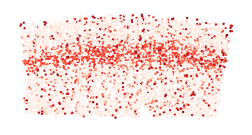

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = NR1_2r[NR1_2r.obs['digital_layer'].between(1.4, 10)]
data.X = np.nan_to_num(data.X)

# 目标基因
target_gene = 'Rorb'

# 检查目标基因是否存在于数据中
if target_gene in data.var_names:
    coords = data.obsm['X_rotated']
    x_rot = coords[:, 0]
    y_rot = coords[:, 1]
    
    # 获取目标基因在 "imputed" 层的表达数据，并转换为一维数组
    gene_expression = data[:, target_gene].layers['imputed'].toarray().flatten()
    
    # 对表达数据先进行 Z-score 标准化，再用 Min-Max 归一化到 [0, 1]
    gene_expression_zscore = zscore(gene_expression)
    gene_expression_normalized = (gene_expression_zscore - gene_expression_zscore.min()) / (gene_expression_zscore.max() - gene_expression_zscore.min())
    
    # 创建散点图，使用旋转后的坐标
    plt.figure(figsize=(3, 1.5))
    plt.scatter(x_rot, y_rot, c=gene_expression_normalized, cmap='Reds', s=0.5)
    
    # 去掉坐标轴
    plt.axis('off')
    plt.show()
else:
    print(f"{target_gene} 不存在于数据中，请检查基因名称。")


In [12]:
DR2_2r=sc.read_h5ad('DR2_2r.h5ad')
NR2_2r=sc.read_h5ad('NR2_2r.h5ad')
DR1_2r=sc.read_h5ad('DR1_2r.h5ad')
NR1_2r=sc.read_h5ad('NR1_2r.h5ad')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 目标基因列表
target_genes = ['Syt17','Stard8','Whrn','Rorb','Scnn1a','Syt2','Tle4','Syt6']

slices_dict = {
    'NR1_2r': NR1_2r,
    'NR2_2r': NR2_2r,
    'DR1_2r': DR1_2r,
    'DR2_2r': DR2_2r
}

# 图形布局：行数 = 4（切片数），列数 = 9（目标基因数）
n_rows = len(slices_dict)
n_cols = len(target_genes)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 1.5), constrained_layout=True)

# 遍历每个切片（行）和每个目标基因（列）
for i, (slice_name, adata_slice) in enumerate(slices_dict.items()):
    # 筛选 digital_layer 在 [1.8, 10] 内的细胞
    subset = adata_slice[adata_slice.obs['digital_layer'].between(1.4, 10)]
    
    # 使用旋转后的坐标，假设存储在 obsm['X_rotated']
    coords = subset.obsm['X_rotated']
    x_rot = coords[:, 0]
    y_rot = coords[:, 1]
    
    for j, gene in enumerate(target_genes):
        ax = axs[i, j]
        # 检查目标基因是否存在
        if gene not in subset.var_names:
            ax.text(0.5, 0.5, f"{gene}\n不存在", ha="center", va="center", fontsize=8)
            ax.axis("off")
            continue

        # 获取该基因在 'imputed' 层的表达数据，并转换为一维数组
        expr = subset[:, gene].layers['imputed'].toarray().flatten()
        # 标准化：先 Z-score，再 Min-Max 归一化到 [0, 1]
        expr_z = zscore(expr)
        expr_norm = (expr_z - expr_z.min()) / (expr_z.max() - expr_z.min())
        
        # 绘制散点图，颜色根据归一化后的表达值
        sc = ax.scatter(x_rot, y_rot, c=expr_norm, cmap='magma_r', s=0.5)
        ax.set_title(f"{slice_name}\n{gene}", fontsize=8)
        ax.axis("off")
        # 为每个子图添加独立的竖直 colorbar
        #cbar = fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
        #cbar.ax.tick_params(labelsize=6)

plt.suptitle("Rotated Spatial Expression of Target Genes", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_imputation.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_imputation.pdf
